**Group 84**

**Team member:**

**Yeong Jer Tseng (ytseng35)**

**Ting Liao (tliao32)**

**Po Hsien Hsu (phsu40)**

[COVID Simulation Project Github](https://github.gatech.edu/phsu40/CSE6730-Covid-Simulation.git)



# Abstract
COVID-19 has been drastically changing the world during the past year. Throughout all the countries suffering from the pandemics, some countries dealt with it well by enforcing people wearing masks and social distancing, starting from the early stage of the pandemic. Therefore, we proposed the Agent-Based Model (ABM) model of the pandemic to understand the behavior of the virus on human beings through compartmental models such as SIR/SEIR/SEIRD with the topological interaction via Cellular Automata (CA) [9]. Also, we considered the influence of wearing masks, vaccination and quarantine on controlling the outbreak [1] [3]. Based on the simulation results, we discussed the impact of variant of mask-wearing population, the effects of different types of masks, vaccinated population, and the effectiveness of hospitalization. In our result, masks and vaccine play important roles in the early stage of virus outbreak.

# Introduction
To simulate models in epidemiology, compartmental models were commonly implemented to represent individual's states regarding the medical status[5].

1. SIR

   The SIR model divides the total population size at time t denoted as P(t) into Susceptible S(t), Infectious I(t) and Recovered R(t). Hence, for the total population we can get:

    $P(t) = S(t) + I(t) + R(t)$

    $\frac{dS}{dt} = -\beta SI$

    $\frac{dI}{dt} = \frac{\beta SI}{N} - \gamma I$

    $\frac{dR}{dt} = \gamma I$ 

   

2. SEIR

   The SEIR model considers an additional factor, Exposed E(t), based on the basic SIR model. That is, a person in the susceptible condition will first be exposed before being infected. Compared with SIR, SEIR accords more with reality. Hence, for the total population we can get: 
   
    $P(t) = S(t) + E(t) + I(t) + R(t)$

    $\frac{dS}{dt} = -\frac{\beta SI}{N}$
    
    $\frac{dE}{dt} = \frac{\beta SI}{N} - \sigma E$

    $\frac{dI}{dt} = \sigma E - \gamma I$
    
    $\frac{dR}{dt} = \gamma I$


   
3. SEIRD

   In order to simulate the ideal COVID-19 situation, we need to include the death population into our model. Therefore, we implement the SEIRD model which takes Death D(t) into consideration and we can get:

    $P(t) = S(t) + E(t) + I(t) + R(t) + D(t)$

    $\frac{dS}{dt} = -\beta I S$

    $\frac{dE}{dt} = \beta I S - \varepsilon E$
      
    $\frac{dI}{dt} = \varepsilon E - \gamma I$

    $\frac{dR}{dt} = \gamma (1 - \delta)I$

    $\frac{dD}{dt} = \delta \gamma I$




In order to model the interaction throughout people during the pandemics, a regular grid of identical was implemented as the topology during the modeling interaction. In the first stage of the program, Cellular Automata is implemented with the compartmental models above as the simple modeling where each cell represents as people. The neighboring cells provide an interaction for spreading the virus in the system. In the second stage of the model, we build an Agent-based Model on top of the grid topology to execute a more sophisticated simulation to study the influence of personal protected equipment and social distancing on the pandemics. 

1. Cellular Automata (CA)

   A Cellular Automata is a discrete model of computation studied in automata theory. It consists of a regular grid of cells, and it can be in any dimension. To do the simulation, an initial state will be given to each cell (time t=0). Then, while a new generation is created, each cell will be assigned a new state based on a fixed rule from the designer. Eventually, the grid of the cellular automata will show the final result of each cell's status after several iterations.

2. Agent-Based Model (ABM)

   ABM simulates the actions of the interactions of autonomous agents, environments, and time evolution.  

   - Agents represent individual or collective entities such as a person or organization. Each agent has its own independent characteristics, deciding the agent's behavior, goals, locations in the simulation.

   - Environments are the space where agents exist and interact with other agents. In ABM, the topological information differs from the case by case. In this project, we implement a grid similar to Cellular Automata as the topology of the interaction, but Network Interaction could also be implemented as environments in ABM.
   
   - Time contributes the "dynamic" to the simulation. During ABM simulation, it will go through a number of time steps where agents and environments update the states/characteristics. 

# Literature

Cellular Automata often uses probabilities to represent the spatial dynamics imposed on the people during the pandemic. To be more specific, we set these people on the grid of a 2d lattice. Then, people would have an initial health state and changed in each time steps based on the probabilities. Most studies proposed the Cellular Automata on SEIR or SEIQR models. However, to simulate the real-world pandemic more accurately. [10] [11] [12]

Most research on the spread of infectious diseases used differential equations and agent-based models, and several studies focused on the spread of COVID-19 in various features. In our study, we considered both COVID-19 infections and some prevention measures. [13] With almost all countries implemented the policy to require people to wear masks and quarantine, we set these two measures into our Agent-Based Model. [15] Basically, to simulate the real-world situation, we use three types of agents: Person, House, and Office. Each of the agents represents an important factor in forming a real society. Also, we modified the Logical Flow Chart. We created our Flow Chart based on the SEIRD models with consideration of daily-life behavior, wearing masks, hospitalization, and vaccination. [14].

Taking reference from other research, we define our parameters as following with an explanation of any modification. We set the number of initial people to be 1000. The initial infected rate is set to be 0.005 because, in other studies, they also considered the initial immune rate, which we did not take into consideration, so we lower the initial infected rate to 50% to make our setting be closed to the actual condition. 

From our references [1], the simulated model is hourly-based ABM with an infection rate associated with the distances between the agents. According to the reference, Every meter would reduce the infection rate by 0.9. Our model with 1000 cells and 1000 agents (people) while based on the Georgia population density (182.9 people/square miles). This would mean that every agent would be on average 35 meters (0.022 miles) apart. Therefore, our infection rate should be around 0.025 (hourly-based). Our model is a 4-hour based simulation, and the infection rate would then be around 0.1. In addition, the daily infection rate would be around 0.5, which is what we implemented for our individual CA models.

In the referenced paper, the exposure rate is 100% after incubation (7 days), the death rate is 0.0001, and the recovery rate is 100% after 14 days. However, it is far from the real situation. It is not true that people must infected or recovered after incubation days, so we set the exposed rate to be 0.5 and the recovery rate to be 0.75. Besides, we used the US death rate of 0.02 as our death rate parameter. For the effectiveness of mask-wearing, we used 50% as default and increased to 90% to see the difference in our result. For the vaccination, we took reference from the vaccination rate of Georgia, which is around 50%. [13] [14] [15]

# Methods
## Stage One - Cellular Automata

  - Compartmental Models: SIR/SEIR/SEIRD

  - CA Components: 

    1. Cell

      Each cell represents a person object with attributes to keep track of the compartmental states, e.g., 0: Susceptible, 1: Infectious.

    2. Time (Day-Based)

      The dynamic system in CA will be updated on a daily basis.
      
  - CA Rule:

    - Initially, we randomly assigns the Infectious status to some cells (person).

    - For SIR:

      - Susceptible status will become Infectious based on the infectious rate

      - Infectious status will become Recovered based on the recovery rate
      
    - For SEIR:

      - Susceptible status will become Exposed based on the infectious rate

      - Exposed status will become Infectious based on the exposed rate with incubation delays

      - Infectious status will become Recovered based on the recovery rate

    - For SEIRD:

      - Susceptible status will become Exposed based on the infectious rate

      - Exposed status will become Infectious based on the latent diseased rate, which is our exposed rate and incubation delays

      - Infectious status will become Recovered based on the recovery rate or Died based on the death rate

## Stage Two - Agent-Based Model

  - Compartmental Models: SEIRD

  - ABM Components:

    1. Agents
    
      - Person:
        - Each person represents an individual with abilities to spread the virus and to get infected within our simulation.  

    2. Environments

      - For the environment or in another way the landscape of our simulation, we adopted a more simplify 2D-square grid topology. There would be 4 types of environments a Person (individual) could be located on the grid: House, Hospital, Office, or on their commuting path.

      - Grid Topology (2D-Square)

        - House: Where people stay with their family. It is time-dependable 

        - Hospital: Where infectious population with symptoms would be brought to isolation and treatment

        - Office: Where people would go to work according to their company

        - Commuting Path: Any potential cells besides a person's house, office, or a hospital within the grid 

    3. Time (Hour-Based)

      - Our ABM model would be based on an hourly-timed axis. Each Person (individual) would have their next move after each hour. They would be either commuting through random walk or staying at their designated Home or Office according to the time.

        - 19:00 - 06:59 -> Home (At House)

        - 07:00 - 08:59 -> Commute (Random Walk: 1 step/hr)

        - 09:00 - 16:59 -> Work (At Office)
        
        - 17:00 - 18:59 -> Commute (Random Walk: 1 step/hr)
        

  - ABM Rule:
    1. At the beginning of the simulation, the program will randomly generate a house, office, hospital and path objects onto the grid map. Later, the system will create a fixed number of people (Agent: Person). An initial small group of the population is infected with the pandemics serving as patient 0's.

    2. For the agent's house and office, they will be assigned with a fixed number of people. For example, each house has 4 people, and each office has 40 people as employees. Other than that, the hospital will be utilized as treating and isolating the infected people.

    3. On each day, people will follow the timetable designed by the system to execute the different tasks, which could be referred in the above paragraph. During the Commute period, all the people will "Random Walk" on the commuting paths. The starting point for all the people are decided by the houses and offices and the direction of the walk is randomly generated in each hour.

    4. The infecting process takes place when an infected person and the healthy ones are in the same cell during commuting. Also, in each house and office, the virus will be transmitted internally during work and home periods. Especially, the office adopts Cellular Automata model to model the discease transmission from the neighboring colleagues at work.

    5. Once a person is exposed to the virus, it will at least take 7 days before becoming infectious. During the exposure period, the person is still contagious to infect others. Infectious people are able to infect others during commute, home, and work periods.

    6. During each day, the system assigns a random number of people to wear masks and get vaccinated. Furthermore, the masked and vaccinated population increases as the day goes by to simulate the increasing number of masked and vaccinated population in the real world. Masks could decrease the infecting rate by 50%, and the vaccine can lower the rate by 90%. Also, there will be a chance for people to recover from the pandemics at the start of a day.

    7. Hospitalization is served as isoloation in the simulation since the patients will no longer contact with healthy people.

<img src="Image/flowChart.png"/>




# Tutorial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/6730-Covid-Simulation-pohsienhsu/src"

/content/drive/MyDrive/6730-Covid-Simulation-pohsienhsu/src


## Cellular Automata

## Model Building
In Cellular Automata model, the grid topology is required to be implemented and each cell in the gril represents as a Person.<Br><Br>

First, we create a Automata Class where it is utilized to create a CA environment. The double for-loop fills the grid with the Person objects with the agent's (person) state and prevState instance variables for future usage when the states have changed in each generation proceeds forward. 

In [ ]:
from Cellular_Automata.constant import *
'''
<Model>
1. SIR
2. SEIR
3. SEIRD
'''
class Automata:
    def __init__(self, numcols, numrows):
        self.rows = numrows
        self.cols = numcols
        self.numpeople = numrows * numcols
        self.day = 0

        # grid
        self.people = []

        for i in range(numcols):
            column = []
            # Make a list of (row) cells for each column
            for j in range(numrows):
                person = self.getPerson()
                
                column.append(person)
            self.people.append(column)

class Person:
    def __init__(self):
        self.incubation = INCUBATION_DAYS
        self.prevState = 0
        self.state = 0

Since we plan to discuss SIR/SEIR/SEIRD model in CA, the states in each model vary. Therefore, we created child classes that inherit from Person class. As you can see below, taking SIR and SEIR for instances, the state 1 represents Infected in SIR but served as Exposed in SEIR. Noting that the users can pass in INIT_INFECTED in the init function(), it is used to decide the ratio of the infected patients in the first day during the simulation.


In [ ]:
class Person_SIR(Person):
    def __init__(self, chance=INIT_INFECTED):
        super().__init__()
        if random.random() <= chance:
            self.state = 1
            self.prevState = 1
          
class Person_SEIR(Person):
    def __init__(self, chance=INIT_INFECTED):
        super().__init__()
        if random.random() <= chance:
            self.state = 2
            self.prevState = 2
        else:
            self.prevState = 0
            self.state = 0

class Person_SEIRD(Person):
    def __init__(self, chance=INIT_INFECTED):
        super().__init__()
        if random.random() <= chance:
            self.state = 2
            self.prevState = 2
        else:
            self.prevState = 0
            self.state = 0

In addition, we also set up the child class from Automata in each model. Each child class not only inherits the instance variables and the double for-loop from the parent class but also appends additional instance variables such as s_arr, i_arr for plotting purposes in the future. 

In [ ]:
class Automata_SIR(Automata):
    def __init__(self, numcols, numrows):
        super().__init__(numcols, numrows)

        # Plotting Purposes
        self.s_arr = []
        self.i_arr = []
        self.r_arr = []
        self.days = []

class Automata_SEIR(Automata):
    def __init__(self, numcols, numrows):
        super().__init__(numcols, numrows)

        # Plotting Purposes
        self.s_arr = []
        self.e_arr = []
        self.i_arr = []
        self.r_arr = []
        self.days = []

class Automata_SEIRD(Automata):
    def __init__(self, numcols, numrows):
        super().__init__(numcols, numrows)

        # Plotting Purposes
        self.s_arr = []
        self.e_arr = []
        self.i_arr = []
        self.r_arr = []
        self.d_arr = []
        self.days = []

## Disease Transmission
After building a CA model, we need a function to iterate the disease transmission. First, let's discuss what are the state transitions in SIR model and how the state changes on a daily basis.

Our rules for disease transmission in our CA model is simple to understand.

 - Think of a 3 x 3 grid, the middle cell is the person we are interested in. That person is surrounded with 8 other neigboring people.

 - The person will be at risk of getting infected if the upper, lower, left, or right neigbor is infected.

 - In addition, with more numbers of patients surrounded, the chance of getting infected will be higher. We compute the probability $P_i$ of a person within the grid gets infected by the number of infected neighbors and the infectious rate:

    $P_{infected} =$ Infectious Rate
    
    $N_{infected} =$ Number of Infected neighbors
    
    $P_i = 1 - (1 - P_{Infected})^{N_{infected}}$

    **In the later paragraphs, we will show how the model updates the CA world on a daily basis with nextGeneration() and applyRules() functions.**

### SIR
In each day, the nextGeneration() is called to update the states among the population. Within the funtion, applyRules() is utilized to decide how a person's state changes.<br><br>

**Noting that number of the patients (Eposed or Infected) in the same space will increase the infecting rate for susceptible people.**

In [ ]:
def nextGeneration(self):
        # Move to the "next" generation
        for i in range(self.cols):
            for j in range(self.rows):
                self.people[i][j].copyState()

        """
        if Top, down, left, right is infected 
            -> the center person will be infected by a chance of INFECTION_RATE
        """
        for i in range(self.cols):
            for j in range(self.rows):
                infectedNeighbors = 0
                iprev, inext, jprev, jnext = i - 1, i + 1, j - 1, j + 1

                if (jprev >= 0 and self.people[i][jprev].getPrevState() == 1):
                    infectedNeighbors += 1
                if (jnext < self.rows and self.people[i][jnext]\
                    .getPrevState() == 1):
                    infectedNeighbors += 1
                if (iprev >= 0 and self.people[iprev][j].getPrevState() == 1):
                    infectedNeighbors += 1
                if (inext < self.cols and self.people[inext][j]\
                    .getPrevState() == 1):
                    infectedNeighbors += 1

                currPerson = self.people[i][j]
                self.applyRulesOfInfection(currPerson, infectedNeighbors)

        self.day += 1

    
def applyRulesOfInfection(self, person, infectedNeighbors):
    chance = random.random()

    if person.prevState == 0:
        if infectedNeighbors >= 1:
            if (chance > (1-INFECTION_RATE)**infectedNeighbors):
                person.setState(1)
    elif person.prevState == 1:
        if chance <= RECOVERY_RATE:
            person.setState(2)

### SEIR

In SEIR model, state 1 no longer represents "Infected" but "Eposed" here. "Exposed" means that a person is actaully infected with the virus but there is no symptoms yet until the virus's incubation period is over. We have a default of 7 incubation days within our model. However, during the "Exposed" period, the person is still able to infect others who are in "Susceptible" states.

In nextGeneration(), it now checks the neighboring states in 1 (Exposed) or 2 (Infected)

In [ ]:
def nextGeneration(self):
        # Move to the "next" generation
        for i in range(self.cols):
            for j in range(self.rows):
                self.people[i][j].copyState()

        """
        if Top, down, left, right is infected 
            -> the center person will be infected by a chance of INFECTION_RATE
        """
        for i in range(self.cols):
            for j in range(self.rows):
                infectedNeighbors = 0
                iprev, inext, jprev, jnext = i - 1, i + 1, j - 1, j + 1

                if (jprev >= 0 and (self.people[i][jprev].getPrevState() == 1 \
                                    or self.people[i][jprev].getPrevState() == 2)):
                    infectedNeighbors += 1
                if (jnext < self.rows and ( self.people[i][jnext].getPrevState() \
                                           == 2 or self.people[i][jnext] \
                                           .getPrevState() == 1)):
                    infectedNeighbors += 1
                if (iprev >= 0 and ( self.people[iprev][j].getPrevState() == 2 \
                                    or self.people[iprev][j].getPrevState() == 1)):
                    infectedNeighbors += 1
                if (inext < self.cols and ( self.people[inext][j].getPrevState() \
                                           == 2 or self.people[inext][j] \
                                           .getPrevState() == 1)):
                    infectedNeighbors += 1

                currPerson = self.people[i][j]
                self.applyRulesOfInfection(currPerson, infectedNeighbors)

        self.day += 1


def applyRulesOfInfection(self, person, infectedNeighbors):
    chance = random.random()

    # Susceptible: 0
    if person.prevState == 0:
        if infectedNeighbors >= 1:
            if (chance > (1-INFECTION_RATE)**infectedNeighbors):
                person.setState(1)            

    # Exposed: 1
    elif person.prevState == 1:
        if person.getIncubation() > 0:
            person.setIncubation(person.getIncubation() - 1)
        elif chance <= EXPOSED_RATE and person.getIncubation() == 0:
            person.setState(2)
            return
        
        # Infectious: 2
        elif person.prevState == 2:
            if chance <= RECOVERY_RATE:
                person.setState(3)
        
        # Recovered: 3

### SEIRD
Now in SEIRD model, we added an additional state "Dead" to the simulation. nextGeneraton() is identical to SEIR model, but applyRules() is updated with a new if-else expression to decide whether a person should die during the infected period.

In [ ]:
def nextGeneration(self):
        # Move to the "next" generation
        for i in range(self.cols):
            for j in range(self.rows):
                self.people[i][j].copyState()

        """
        if Top, down, left, right is infected 
            -> the center person will be infected by a chance of INFECTION_RATE
        """
        for i in range(self.cols):
            for j in range(self.rows):
                infectedNeighbors = 0
                iprev, inext, jprev, jnext = i - 1, i + 1, j - 1, j + 1

                if (jprev >= 0 and (self.people[i][jprev].getPrevState() == 1 \
                                    or self.people[i][jprev].getPrevState() == 2)):
                    infectedNeighbors += 1
                if (jnext < self.rows and (self.people[i][jnext].getPrevState() \
                                           == 2 or self.people[i][jnext]\
                                           .getPrevState() == 1)):
                    infectedNeighbors += 1
                if (iprev >= 0 and (self.people[iprev][j].getPrevState() == 2 \
                                    or self.people[iprev][j].getPrevState() == 1)):
                    infectedNeighbors += 1
                if (inext < self.cols and (self.people[inext][j].getPrevState() \
                                           == 2 or self.people[inext][j]\
                                           .getPrevState() == 1)):
                    infectedNeighbors += 1

                currPerson = self.people[i][j]
                self.applyRulesOfInfection(currPerson, infectedNeighbors)
        self.day += 1


def applyRulesOfInfection(self, person, infectedNeighbors):
    chance = random.random()

    # Susceptible: 0
    if person.prevState == 0:
        if infectedNeighbors >= 1:
            if (chance > (1-INFECTION_RATE)**infectedNeighbors):
                person.setState(1)
                
    # Exposed: 1
    elif person.prevState == 1:
        if person.getIncubation() > 0:
            person.setIncubation(person.getIncubation() - 1)
        elif chance <= EXPOSED_RATE and person.getIncubation() == 0:
            person.setState(2)
            return
            
    # Infectious: 2
    elif person.prevState == 2:
        if chance <= RECOVERY_RATE:
            # Recovered: 3
            person.setState(3)
        else:
            chanceDeath = random.random()
            if chanceDeath <= DEATH_RATE:
                # Dead: 4
                person.setState(4)

## Modeling & Analysis

In [ ]:
# Package Import
from Cellular_Automata.SIR import *
from Cellular_Automata.SEIR import *
from Cellular_Automata.SEIRD import *
from Cellular_Automata.constant import *
from Visualization.Plotting_CA import *
plt.show()

### SIR


In [ ]:
sir = Automata_SIR(100, 100)
print(f"Total People: {sir.numpeople}")
print(f"Initial Patient Number: {sir.getI()}")
# sir.accumulateData()
for n in range(50):
    sir.nextGeneration()

mat_arr = []
days = [0, 4, 9, 14, 24, 49]
for i in days:
    mat_arr.append(sir.getPeopleStates_Arr()[i])

Total People: 10000
Initial Patient Number: 91


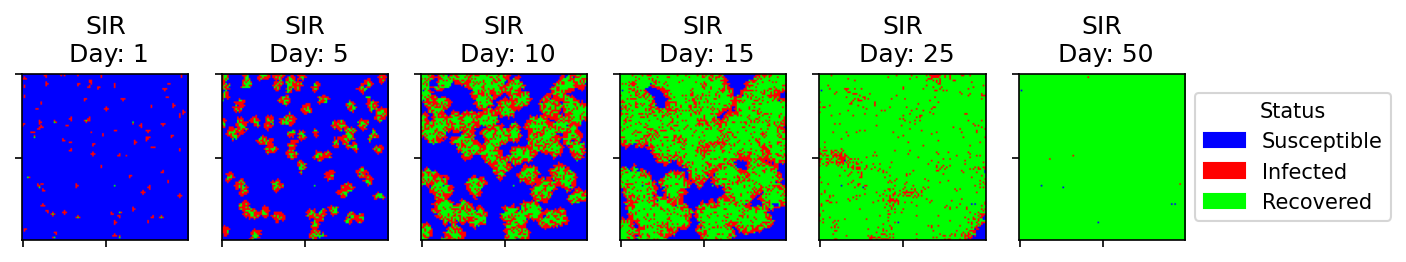

In [ ]:
printMatrix_multi_CA(mat_arr=mat_arr, model="SIR", day=days)

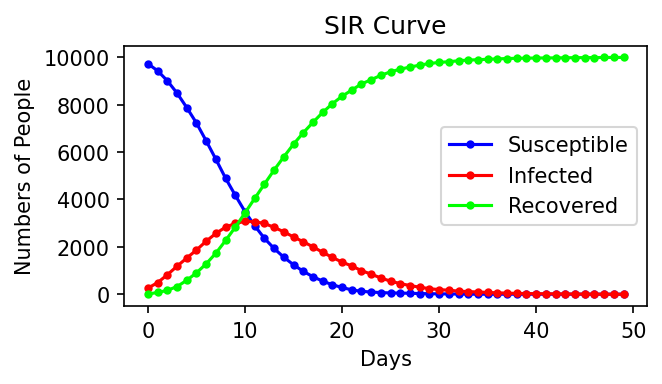

In [ ]:
sir.plotCurve()

### SEIR

In [ ]:
seir = Automata_SEIR(100, 100)
print(f"Total People: {seir.numpeople}")
print(f"Initial Patient Number: {seir.getI()}")
for n in range(50):
    seir.nextGeneration()

mat_arr = []
days = [0, 4, 9, 14, 24, 49]
for i in days:
    mat_arr.append(seir.getPeopleStates_Arr()[i])

Total People: 10000
Initial Patient Number: 98


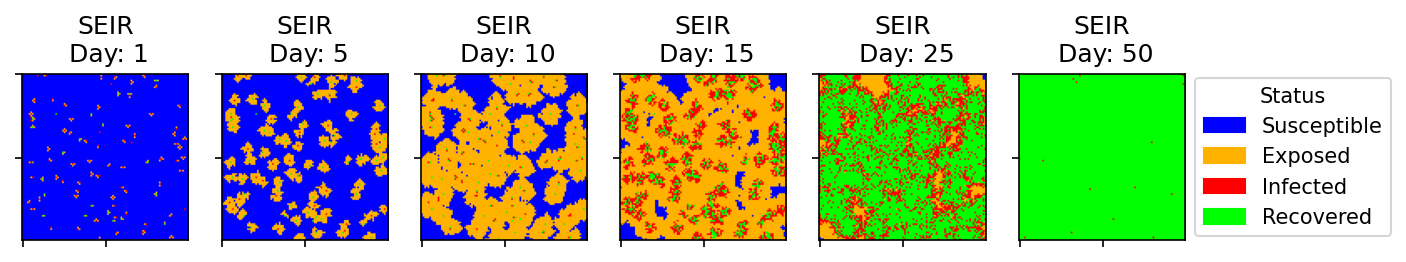

In [ ]:
printMatrix_multi_CA(mat_arr=mat_arr, model="SEIR", day=days)

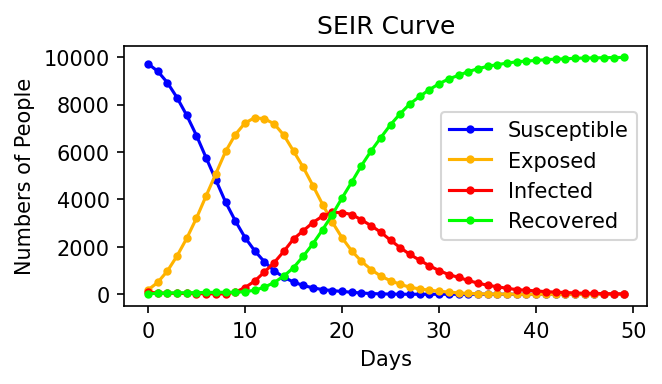

In [ ]:
seir.plotCurve()

### SEIRD

In [ ]:
seird = Automata_SEIRD(100, 100)
print(f"Total People: {seird.numpeople}")
print(f"Initial Patient Number: {seird.getI()}")
# seird.accumulateData()
for n in range(50):
    seird.nextGeneration()

mat_arr = []
days = [0, 4, 9, 14, 24, 49]
for i in days:
    mat_arr.append(seird.getPeopleStates_Arr()[i])

Total People: 10000
Initial Patient Number: 97


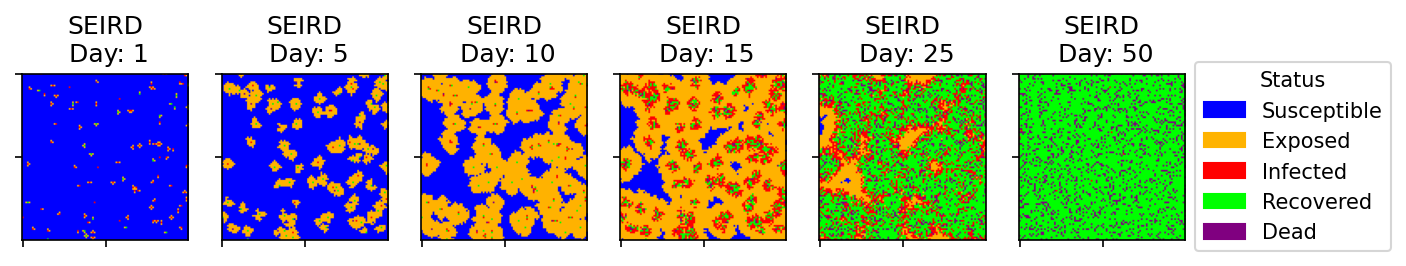

In [ ]:
printMatrix_multi_CA(mat_arr=mat_arr, model="SEIRD", day=days)

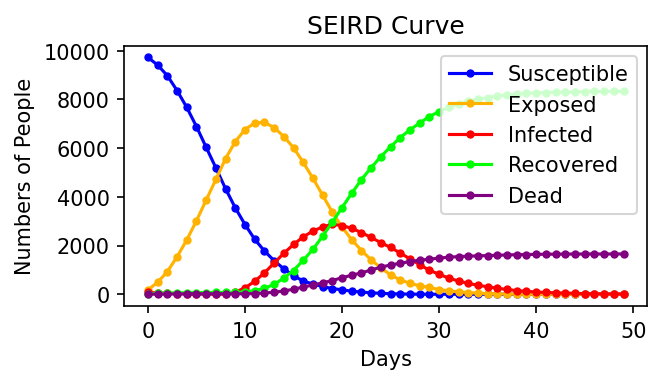

In [ ]:
seird.plotCurve()

SIR model results in a fast outbreak since there is no incubation period during the disease transmission. The peak of infected population happens approximately at day 10. On the other hand, in the SEIR and SEIRD model, with the implementation of "Exposed" state, the incubation period enables the virus to keep a low profile in the first 7 days, resulting a massive outbreak in the "Exposed" and "Exposed" population compared to SIR model.

In addition, take a closer look at the matrix plots, they resemble a closed space filled with static people. However, in order to generate a more realistic model, we decided to take the SEIRD model and the grid topology into Agent-Based Model since

1. COVID-19 is infamous for having a long incubation period
   
2. With "Dead" status added to the model, it is a step closer to the real world situation.

3. We would like to implement more individual actions to the system such as commuting/wear masks/vaccinated, etc.

# Agent-Based Model

## Model Building
In Agent-Based Model, an Agent represents an entity with individual states and behaviors. At the beginning of ABM, we built an agent Person in the program to keep records of the location of a person and states/prestates to update SEIRD States in each time generation and disease spreading logistic. 

Noting that In SEIRD model, 0: Susceptible, 1: Exposed, 2: Infectious, 3: Recovered, 4: Dead. 

Other than that, each person has a medical attribute object storing important information in wearing mask/vaccinating/hospitalizing, etc.

In [ ]:
class Person:
    """
    class Person:
        Serving as an agent in the ABM. 
        Each Person would represent each individuals within our simulation.

    @attrs: 
    state: int (0: susceptible, 1: exposed, 2: infectious, 3: recovered, 4: dead, 5: dummy)
    prevState: int
    grid_location: tuple (ex. (x,y))
    medical: dict (ex. {mask: False, vaccinated: False, hospitalized: False, incubation: 0})
    """
    def __init__(self, id:int, state:int, prevState:int, medical:dict={}):
        self.id = id
        self.state = state
        self.prevState = prevState
        self.grid_location = None
        self.association = {"office": None, "house": None}
        if (not medical):
            self.medical = {
                "mask": False,
                "vaccinated": False,
                "hospitalized": False,
                "incubation": 7,
                "zombie": False
            }
        else:
            self.medical = medical

Once we finished building agent class, the topology of our ABM model requires Cell Class to model the cells in the grid. 

In [ ]:
from Agent_Based_Model.Constant.constant import *
class Cell:
    """
    class Cell:
        Serving as a cell within the grid topology in the ABM.

    @attrs: 
    grid_location: tuple (ex. (x,y))
    """
    def __init__(self, grid_location:tuple):
        self.grid_location = grid_location

From our topology, we have hospital, office, house, and path on the grid map to model what would a real would looks like. It is worth noting that each class is inherited from Cell class. Thus, they share the grid_location attribute and various Getter and Setter functions (Shown in the GitHub repository).

Each house and office have a fixed number of memebers. For example, first, the total number of cells within the grid is 100*100 = 10000, our default number of people is 1000, the default number of family member is 4 for a house object, and the number of employee is 40 for an office object. However, there will be only one hospital in our small world. Noting that the default capacity of the hospital is up to the total population within the system.

In [ ]:
class Hospital(Cell):
    """
    class Hospital:
        Serving as a hospitalcell within the grid topology in the ABM.

    @attrs: 
    (super)
    grid_location: tuple (ex. (x,y))
    (self)
    capacity: int
    patients: list (a list of Person class)
    """
    def __init__(self, grid_location:tuple, patients:list=[]):
        super().__init__(grid_location)
        self.capacity = sys.maxsize
        self.patients = patients

class House(Cell):
    """
    class House:
        Serving as a house cell within the grid topology in the ABM.

    @attrs: 
    (super)
    grid_location: tuple (ex. (x,y))
    (self)
    capacity: int
    members: list (a list of Person class)
    """
    def __init__(self, id:int, grid_location:tuple, members:list=[]):
        super().__init__(grid_location)
        self.id = id
        self.capacity = HOUSE_SIZE
        self.guests = []
        self.members = members #[...<person>]
      
class Office(Cell):
    """
    class Office:
        Serving as an office cell within the grid topology in the ABM.

    @attrs: 
    (super)
    grid_location: tuple (ex. (x,y))
    (self)
    capacity: int
    employees: list (a list of Person class)
    """
    def __init__(self, id:int ,grid_location:tuple):
        super().__init__(grid_location)
        self.id = id
        self.CA = []
        self.employees = []
        self.guests = []
        self.capacity = OFFICE_CAPACITY

class Path(Cell):
    """
    class Path:
        Serving as a path cell within the grid topology in the ABM.

    @attrs: 
    (super)
    grid_location: tuple (ex. (x,y))
    (self)
    capacity: int
    passengers: list (a list of Person class)
    """
    def __init__(self, grid_location:tuple, passengers:list=[], capacity:int=0):
        super().__init__(grid_location)
        self.capacity = capacity
        self.passengers = passengers #[...<person>]

After finishing with components, we are now building a system class object where all the previous components would be utilized here and it is also the class where the time progression and disease transmission happens.

* In the first group of the instance variables, self.world represents a matrix storing all the path/house/office/hospital objects. The rows and cols decide the height and the width of the grid. In addition, self.time records time progression in the system (unit: hour).

* Self.people/dead(dead peple)/offices/houses/hospitals/paths store the respective objects in an array for an easier access in the later functions.

* There are some variables that are especially set up for plotting purposes. In SEIRD model, the nubmer of each states is required to be recorded for SEIRD curves.

In ABM and SEIRD model, most of the occurences in the logical events are decided by several constants, which could be used to decide the frequency of a certain event, the number of the states, or objects in the system. 

**It is worth noting we also put the constant variables in the function arguments. The variables would enable the users to pass in different constants to model a different world in a more efficient way.**


In [ ]:
class ABM:
    def __init__(self, numcols: int=100, numrows: int=100,
                 zombieMode: bool=False, INIT_INFECTED=INIT_INFECTED,
                 INFECTION_RATE=INFECTION_RATE, INCUBATION_DAYS=INCUBATION_DAYS,
                 EXPOSED_RATE=EXPOSED_RATE, RECOVERY_RATE=RECOVERY_RATE,
                 DEATH_RATE=DEATH_RATE, WEAR_MASK=WEAR_MASK,
                 WEAR_MASK_POPULATION=WEAR_MASK_POPULATION, 
                 VACCINATED=VACCINATED,
                 VACCINATED_POPULATION=VACCINATED_POPULATION,
                 HOSPITALIZED=HOSPITALIZED, BEFORE_HOSPITAL=BEFORE_HOSPITAL):
      
        self.world = []
        self.rows = numrows
        self.cols = numcols
        self.time = 0
        self.people = []
        self.dead = []
        self.offices = []
        self.houses = []
        self.hospitals = []
        self.paths = []

        # Zombie Mode
        self.zombies = []
        self.zombieMode = zombieMode
        self.zombies_arr = []

        # Plotting Purposes - Keep Record of the number of SEIRD in every hour
        self.s_arr = []
        self.e_arr = []
        self.i_arr = []
        self.r_arr = []
        self.d_arr = []
        self.days = []
        self.mask_arr = []
        self.vaccinated_arr = []
        self.hospitalized_arr = []

        # Constants
        self.INIT_INFECTED = INIT_INFECTED
        self.INFECTION_RATE = INFECTION_RATE
        self.INCUBATION_DAYS = INCUBATION_DAYS
        self.EXPOSED_RATE = EXPOSED_RATE
        self.RECOVERY_RATE = RECOVERY_RATE
        self.DEATH_RATE = DEATH_RATE
        self.WEAR_MASK = WEAR_MASK
        self.WEAR_MASK_POPULATION = WEAR_MASK_POPULATION
        self.VACCINATED = VACCINATED
        self.VACCINATED_POPULATION = VACCINATED_POPULATION
        self.HOSPITALIZED = HOSPITALIZED
        self.BEFORE_HOSPITAL = BEFORE_HOSPITAL

        for i in range(self.rows):
            column = []
            for j in range(self.cols):
                column.append(None)
            self.world.append(column)


In order to create various objects such as houses and offices onto the grid map, we need a starting function called createWorld() to generate the population and the location objects. The details of the "create" functions are shown in the Github repository.

In [ ]:
def createWorld(self, num_people):
        """
        Hello World!
        - Generate random Location Object (House, Office, Path)
            - Each object should cannot locate in the same cell.
            - House contains a fixed number (default=4) of Person as a family
            - Office contains a fixed number (default=40) of Person as a Company
        - Generate a fixed number (default=1000) of Person in the world
            - A part of the people are infected with COVID-19 in the first day
            - The number of the initial patients are decided by a rate in the constant, thus, the number varies in each simulation
        """
        self.createPeople(num_people)
        self.createHouse(num_people)
        self.createOffice(num_people)
        self.createHospital()
        self.createPath()

However, it is worth mentioning createOffice() function here in the notebook. First of all, an office on a cell does not plainly represent a single cell. We actually implemented another grid onto the cell where an office is located. This additional grid will work in a rule of Cellular Automata as our stage one model. The reason of implmenting Cellular Automata here is that we would like to simulate the disease transmission in a closed space. Creating a CA allows the person to be infected by their neighbors which is similar to the real world situation.

In createOffice() funciton, basically the program generates coordinates randomly with generate_coord() function and then to checks whether there is an exisiting location on that specific cell or not. If not, then we create an office object there and call the init_CA() function to generate a CA system within a grid.

In [ ]:
# class ABM
def createOffice(self, num_people):
        """
        Randomlize create office for ABM according to the params
        @params:
        num_people: int
        (num_house = num_people/40)
        """
        arr = self.people.copy()
        random.shuffle(arr)
        for i in range(int(num_people/OFFICE_CAPACITY)):
            while True:
                randomRow, randomCol = self.generate_coord()
                if not self.world[randomRow][randomCol]:
                    # print(f"Office: {i}, ({randomRow}, {randomCol})")
                    self.world[randomRow][randomCol] =  \
                        Office(id=i,grid_location=(randomRow, randomCol))
                    self.offices.append(self.world[randomRow][randomCol])
                    # 1. Fill in employees
                    self.world[randomRow][randomCol].setEmployees(
                        arr[i*OFFICE_CAPACITY: OFFICE_CAPACITY*(i+1)])
                    # 2. Create CA in Office
                    self.world[randomRow][randomCol].init_CA(self.INFECTION_RATE,
                                                             self.WEAR_MASK,
                                                             self.VACCINATED)

                    for person in arr[i*OFFICE_CAPACITY: OFFICE_CAPACITY*(i+1)]:
                        person.setOffice(self.world[randomRow][randomCol])
                    break

# class Office
def init_CA(self, INFECTION_RATE=INFECTION_RATE, WEAR_MASK=WEAR_MASK, \
            VACCINATED=VACCINATED):
        """
        Initialize the Cellular Automata model within each cell of our ABM grid.
        Serving as an inner grid within each cells.
        """
        # (8, 5) -> Hard Code
        self.CA = Automata(8, 5, self.employees, INFECTION_RATE=INFECTION_RATE, 
                           WEAR_MASK=WEAR_MASK, VACCINATED=VACCINATED)
  
class Automata:
    def __init__(self, rows:int, cols:int, employees:list, \
                 INFECTION_RATE=INFECTION_RATE, WEAR_MASK=WEAR_MASK, \
                 VACCINATED=VACCINATED):
        self.rows = rows
        self.cols = cols
        self.numpeople = rows * cols
        self.people = []
        self.num_zombies = 0

        for i in range(rows):
            row = []
            for j in range(cols):
                person = employees[i*cols + j]    
                row.append(person) 
            self.people.append(row)
        
        self.INFECTION_RATE = INFECTION_RATE
        self.WEAR_MASK = WEAR_MASK
        self.VACCINATED = VACCINATED

## Disease Transmission
After building a world in Agent-Based Model, we need a function to iterate the disease transmission and event occuring logistics.
First, let's discuss what are the state transitions in SEIRD model and how are the states changed during the simulation.

1. Susceptible (State = 0) -->  Exposed (State = 1)
    - When people are exposed to the presence of patients, the program will decide whether a person is infected by the virus according to the INFECTED_RATE constant that we set up after creating the ABM model. If the rate is higher, the chance of getting infected will be higher. Once a person is exposed to the virus, the person has the ability to infect healthy people but yet they exhibit no symptoms at all.
  
        $P_{infected} =$ Infectious Rate

        $N =$ Number of Infected neighbors

        $V =$ Vaccination Effectiveness

        $M =$ Mask Effectiveness

        $P_{person} = P_{infected}MV$

        $P_{unmasked} = (1 - P_{person})^{N_{unmasked}}$

        $P_{masked} = (1 - P_{person}M)^{N_{masked}}$

        $P_i = 1 - P_{unmasked}P_{masked}$

        **Noting that number of the patients (Eposed or Infected) in the same space will increase the infected rate ($P_i$) for susceptible people.**

2. Exposed (State = 1) --> Infected (State = 2)
    - There is an incubation period (default = 7 days) in between "Exposed" state and "Infected" state. After the incubation period, the program will decide whether a person is infected by the virus according to EXPOSED_RATE.

3. Infected (State = 2) --> Recovered (State = 3)

4. Infected (State = 2) --> Dead (State = 4)

    - The patients could either stay as infected, become recovered, or dead according to each probability respectively.



In [ ]:
def applyRules(self, person:Person, currentHour:int, currentDay:int,
               num_Contact_withMask:int=0, num_Contact_noMask:int=0,
               num_Contact_zombie:int=0):
        """
        Rules of SEIRD model to apply for ABM
        @params:
        person: Person (individuals)
        currentHour: int (the current hour time)
        """
        chance = random.random()
        # Susceptible: 0
        if person.getPrevState() == 0:
            infected_rate = self.INFECTION_RATE
            # if the current person wears a mask
            if person.getMask():
                infected_rate *= self.WEAR_MASK
            # if the current person is vaccinated
            if person.getVaccinated():
                infected_rate *= self.VACCINATED
            # The surrounded people
            if chance > (1 - infected_rate*self.WEAR_MASK)**num_Contact_withMask \
             * (1 - infected_rate)**(num_Contact_noMask + num_Contact_zombie):
                person.setState(1)
                # print("Exposed: S->E, Person: ", person.getID())
        
        elif currentHour == 0 and currentDay != 0:
            # Exposed: 1
            if person.getPrevState() == 1:
                if person.getIncubation() > 0:
                    person.decreaseIncubation()
                elif chance <= self.EXPOSED_RATE and person.getIncubation() == 0:
                    person.setState(2)
                    # print("Infected: E->I, Person: ", person.getID())

            # Infectious: 2
            elif person.getPrevState() == 2:
                # Version 1 
                if chance <= self.RECOVERY_RATE:
                    # Recovered: 3
                    person.setState(3)
                elif chance <= self.DEATH_RATE + self.RECOVERY_RATE:
                    # Dead: 4
                    person.setState(4)
                    if (self.zombieMode):
                        person.setZombie(True)
            
            # Recovered: 3 (Only effected in zombie mode)
            elif person.getPrevState() == 3 and self.zombieMode:
                infected_rate = self.INFECTION_RATE
                if person.getMask():
                    infected_rate *= self.WEAR_MASK
                if person.getVaccinated():
                    infected_rate *= self.VACCINATED
                if chance > (1 - infected_rate*self.\
                             WEAR_MASK)**num_Contact_withMask \
                             * (1 - infected_rate)**(num_Contact_noMask \
                                                     + num_Contact_zombie):
                    person.setState(1)

nextGeneration(), an instance method in ABM class, would be called in each iteration as the time (hour) increases. There are four steps in each iteration 

1. Move to the "next" generation

    - Recall that each Agent Person has "state" and "prevState" representing SEIRD status. Thus, at the beginning of the iteration. The system will record the current state into the prevState in order to modify the current state in the later logic
    
2. Time Check - Actions vary in each hour

    - In a day of a simulated world, there are scheduled tasks for the agent Person to simulate the real world actions.
  
    - 19:00 - 06:59 -> Home

        - During the time home, each person stays at the grid_location where their own houses are located. Noting that people could be easily infected by the family members. applyRules() will be implemented at 00:00 to decide the newly infected patients in each families.

    - 07:00 - 08:59 -> Commute (Random Walk)

        - During commute period, each person walks randomly from their own house locations to the neighboring cells. People walk two steps during this 2-hour period. When people step to the same cell, there might be an infection occurring.

    - 09:00 - 16:59 -> Work

        - Each person belongs to a company, an office object on the grid map. The first thing in this step will be updating the grid_location for each person in the model. In addition, people are contacting with their colleagues at work. The topology in the offce is also a grid map where we simulate the neighboring colleagues. 

            $P_{infected} =$ Infectious Rate

            $N_{infected} =$ Number of Infected neighbors
            
            $P_i = 1 - (1 - P_{Infected})^{N_{infected}}$
  
            **It is worth noting that the infecting process is differnt from the previous code blocks. Yet, it is an implementation from our Cellular Automata model. The neighboring infected agents affect the risk of disease transmission at work**.

    - 17:00 - 18:59 -> Commute (Random Walk)

        - The step is very similar to the morning commute period. The only difference will be the starting point, which is the office's grid_location.
    
    - **Noting that number of the patients (Eposed or Infected) will increase the infecting rate for susceptible people.**

3. Update at 00:00 

    - In the beginning of a day, the program will execute the following actions

        - Removed dead people from the houses

        - Hospitalized and checkout patients from the hospital

        - Keep record of SEIRD numbers for plotting purposes

4. Time Progression

    - In each iteration of calling nextGeneration(), the time increment will be an hour in our simulation. But, **noting here that some of the events occur on a daily basis. Therefore, there is a scheduled time for certain actions or events.**

In [ ]:
def nextGeneration(self):
        """
        1. Move to the "next" generation
        2. Time Check - Actions vary in differnt hour
            - 1900 - 0659 -> Home
            - 0700 - 0859 -> Commute (Random Walk)
            - 0900 - 1659 -> Work
            - 1700 - 1859 -> Commute / Happy (Random Walk)
        3. Update at 00:00
            - Remove dead people
            - Get daily SEIRD data
            - Wear Mask/Get Vaccinated/Hospitalized
            - Recovery (Implemented in applyRules)
        4. Time Progression (hourly)
        """
        # 1. Move to the "next" generation
        for i in range(len(self.people)):
            self.people[i].copyState()
    
        currentDay = self.getDay()
        currentHour = self.getHour()

        # 3. Update at 00:00
        if currentHour == 0:
            self.removeDead()
            if currentDay >= self.BEFORE_HOSPITAL: 
                self.hospitalized()
                self.checkOutHospital(currentHour, currentDay)
            self.accumulateData()
        
        # zombie walks around all the time
        if self.zombieMode:
            self.walkingDead()

        # 2. Time Check - Actions vary in differnt hour
        # Home
        if currentHour in HOME_TIME:
            # 1. Check current location:
            # Check time: 19:00 & the initial time (first hour of the first day)
            if currentHour == 19 or (currentHour == 0 and currentDay == 0):
                for person in self.people:
                    # Only Check People not in hospital from self.people
                    if not person.getHospitalized():
                        person.setGridLocation(
                            person.getHouse().getGridLocation())

            # 2. Speard of virus at 00:00 per day
            if (currentHour%24) == 0:
                # print(f"Day: {currentDay}")
                for house in self.houses:
                    # Get healthy and infected people
                    healthyPeople = []
                    patients_mask = 0
                    patients_no_mask = 0
                    zombies = self.locatingZombies(
                        house.getGridLocation(),currentHour)
                    for person in house.getMembers():
                        # Only Check People not in hospital from self.people
                        if not person.getHospitalized():
                            if person.getState() == 0 or person.getState() == 3:
                                healthyPeople.append(person)
                            elif person.getState() == 1 or person.getState() == 2:
                                if person.getMask():
                                    patients_mask += 1
                                else:
                                    patients_no_mask += 1
                                # Exposed or Infected Person could turn infected/recoverd/death
                                self.applyRules(person, currentHour, currentDay)

                    # Infect healthy people
                    for person in healthyPeople:
                        if self.zombieMode:
                            self.applyRules(person, currentHour, currentDay,
                                            patients_mask, patients_no_mask,
                                            zombies)
                        else:
                            self.applyRules(person, currentHour, currentDay,
                                            patients_mask, patients_no_mask)
            
            # 3. Wear mask before going to work
            if currentHour == 6:
                self.wearMask(currentDay)
            elif currentHour == 19:
                self.takeDownMask()
                self.vaccinated()

        # Commute
        elif currentHour in COMMUTE_TIME:
            # 1. Check current location
            self.randomWalk()
            # Let the walking dead rise
            if self.zombieMode:
                self.walkingDead()

            # 2. Spread of virus
            '''
            InfectedGrid (dict) store the
                key: location (tuple) 
                value: total number of infected people on that location
            If there is an exposed or infected person on that location, the value will plus 1.
            '''
            infectedGrid = {}
            for person in self.people:
                # Only Check People not in hospital from self.people
                if person.getState() in [1,2] and not person.getHospitalized():
                    if person.getGridLocation() not in infectedGrid.keys():
                        infectedGrid[person.getGridLocation()] = {
                            "mask": 0,"no_mask": 0, "zombie": 0}
                    if person.getMask():
                        infectedGrid[person.getGridLocation()]["mask"] += 1
                    else:
                        infectedGrid[person.getGridLocation()]["no_mask"] += 1
            
            if self.zombieMode:
                infectedGrid = self.locatingZombies(infectedGrid, currentHour)

            '''
            Loop through each person. If the person is susceptible 
            and stand on same location with infected or exposed people, we 
            applied the applyRules function
            '''
            for person in self.people:
                # Only Check People not in hospital from self.people
                if person.getState() in [0,3] and person.getGridLocation() in \
                    infectedGrid.keys() and not person.getHospitalized():
                    num_mask = infectedGrid[person.getGridLocation()]['mask']
                    num_no_mask = infectedGrid[person.getGridLocation()]['no_mask']
                    if self.zombieMode:
                        num_zombie = infectedGrid[person.getGridLocation()]['zombie']
                        if person.getState() == 3:
                            self.applyRules(person, currentHour, currentDay, \
                                            num_Contact_zombie=num_zombie)
                        else:
                            self.applyRules(person, currentHour, currentDay, \
                                            num_mask, num_no_mask, num_zombie)               
                    else:
                        self.applyRules(person, currentHour, currentDay, \
                                        num_mask, num_no_mask)

        # Work
        elif currentHour in WORK_TIME:
            # 1. Check current location
            if currentHour == 9:
                for person in self.people:
                    # Only Check People not in hospital from self.people
                    if not person.getHospitalized():
                        person.setGridLocation(
                            person.getOffice().getGridLocation())
            # 2. Spread of virus
            for office in self.offices:
                # CA Version
                if (currentHour%12)==0:
                    if (self.zombieMode):
                        num_zombies = self.locatingZombies(
                            office.getGridLocation(), currentHour)
                        office.appendZombies(num_zombies)
                    else:
                        office.appendDummies()
                    office.getCA().updateGrid(office.getEmployees())
                    office.getCA().nextGeneration()
                    office.clearDummies()

        # 4. Time Progression (hourly)
        self.time += 1

Here are the functions that are already implemented in the nextGeneration(), yet they have not been discussed or mentioned. In our project goal, we would like to see the influence of wearing masks/vaccine/hospitalization on the virus outbreak and the SEIRD curve.

1. Mask

    - There will be a ratio of people wearing masks decided by WEAR_MASK_POPULATION. And the number of population increases as the day goes by. Since, in the real world, people are gradually getting aware of the importance of the masks on preventing from the virus transmission.

    - In our simulation, people wear masks at all locations except home.

    - Mask has an influence on reducing the infectious rate based on the mask effectiveness WEAR_MASK. It is implemented in applyRules() function discussed in the previous paragraph

2. Hospital

    -  At 00:00, the program puts a ratio of infected patients (State = 4) into the hospital. On the other hand, it will also remove the people that are recovered or dead during their time at the hospital

3. Vaccine

    - There will be a ratio of people vaccinated based on VACCINATED_POPULATION. The number of population increases as the day goes by. Since, in the real world, people are gradually getting vaccinated
    - Vaccine has an influence on reducing the infectious rate based on the vaccine effectiveness VACCINATED. It is implemented in applyRules() function discussed in the previous paragraph


In [ ]:
def wearMask(self, currentDay:int):
        """
        Implement random portion of the people to wear mask
        Time: COMMUTE hours and OFFICE hours
        @rtn
        count: int (number of people wore mask)
        """
        # wear_rate = 0.01
        # new_wear_rate = 0.01 + 0.01*currentday
        total = 0
        if self.WEAR_MASK_POPULATION == 0:
            return
        percent = self.WEAR_MASK_POPULATION+(currentDay*0.01)
        for p in self.people:
            if not (p.getState() in [4,5]):
                chance = random.random()
                if chance <= percent:
                    p.setMask(True)
                if p.getMask():
                    total += 1
        self.mask_arr.append(total)

def takeDownMask(self):
        """
        Implement all people take dowm mask when returning their home
        Time: HOME hours
        """
        for p in self.people:
            p.setMask(False)

def vaccinated(self):
        """
        Implement random portion of the people to get vaccinated
        @rtn
        count: int (number of people got vaccinated)
        """
        total = 0
        def filterVaccine(person):
            if (not person.getVaccinated() and person.getState() not in [3, 4, 5]):
                return True
            else:
                return False  
        new_people = list(filter(filterVaccine, self.people))

        for p in new_people:
            chance = random.random()
            if chance <= self.VACCINATED_POPULATION:
                p.setVaccinated(True)
                total += 1
        
        prev = 0 if len(self.vaccinated_arr) == 0 else self.vaccinated_arr[-1]
        self.vaccinated_arr.append(prev+total)

def hospitalized(self):
        """
        Implement function to put infected population into hospital, hospitalized
        Time: HOME hour
        """
        def filterInfected(person):
            if person.getState() == 2:
                return True
            else:
                return False

        infected_pp = list(filter(filterInfected, self.people))
        
        for p in infected_pp:
            chance = random.random()
            if chance <= self.HOSPITALIZED:
                p.setHospitalized(True)
                p.setGridLocation(self.hospitals[0].getGridLocation())
                self.hospitals[0].checkIn(p)
              
def checkOutHospital(self, currentHour, currentDay):
        """
        Implement people that are hospitalized can recover and return back home
        Time: HOME hour
        """
        patients = self.hospitals[0].getPatients()
        
        for p in patients:
            self.applyRules(p, currentHour, currentDay)
            # Check out recovered people from the hospital
            if (p.getState() == 3):
                house_loc = p.getHouse().getGridLocation()
                p.setGridLocation(house_loc)
                p.setHospitalized(False)
                self.hospitals[0].checkOut(p)

## Simulation & Analysis


### Package Import
From previous description, we explained how the model builds with the actaul code demonstration. But, there are various small functions required for the model to run but are not important enough to be discussed in the previous paragraphs. Consequently, functions should be imported from the local python project folders below. 


In [ ]:
from Agent_Based_Model.ABM import *
from Visualization.Plotting_ABM import *

### Influence of Mask Genre

Coefficients of Reducing Particle Outward Emission Rate $\beta_{oe}$:[16]

1. N95 Masks: $\beta_{oe} = 90$%

2. Surgical Masks: $\beta_{oe} = 75$%

3. Double-Layer Cotton Masks: $\beta_{oe} = 5$%


With the 3 types of mask, the figures below show obvious trend that the higher the coefficient of reducing the particle outward emission rate the more it is effective in preventing the spread of infections. If we look further into the figures of the surgical masks and N95, we can observe that the surgical mask does actually prevent the spread very well and almost as well as N95. Even though N95 has a notable increase in $\beta_{oe}$ comparing to surgical masks, the SEIRD curves did not exhibit significant difference of effectiveness. The obvious result shows that the double-layer cotton masks show almost 0 effect to prevent the spread. In our reference [16], intense cough motions with a double-layer cotton mask can even have a higher $\beta_{oe}$ than not wearing a mask at all. 

In [ ]:
day = 50


        N95 Masks
        Highest Exposed Popluation: 27 at Day: 15
        Highest Infected Popluation: 7 at Day: 0
        Ratio of Susceptible Population: 0.90
        

        Surgical Masks
        Highest Exposed Popluation: 256 at Day: 39
        Highest Infected Popluation: 43 at Day: 50
        Ratio of Susceptible Population: 0.24
        

        Double Layer Cotton Masks
        Highest Exposed Popluation: 965 at Day: 12
        Highest Infected Popluation: 233 at Day: 18
        Ratio of Susceptible Population: 0.00
        


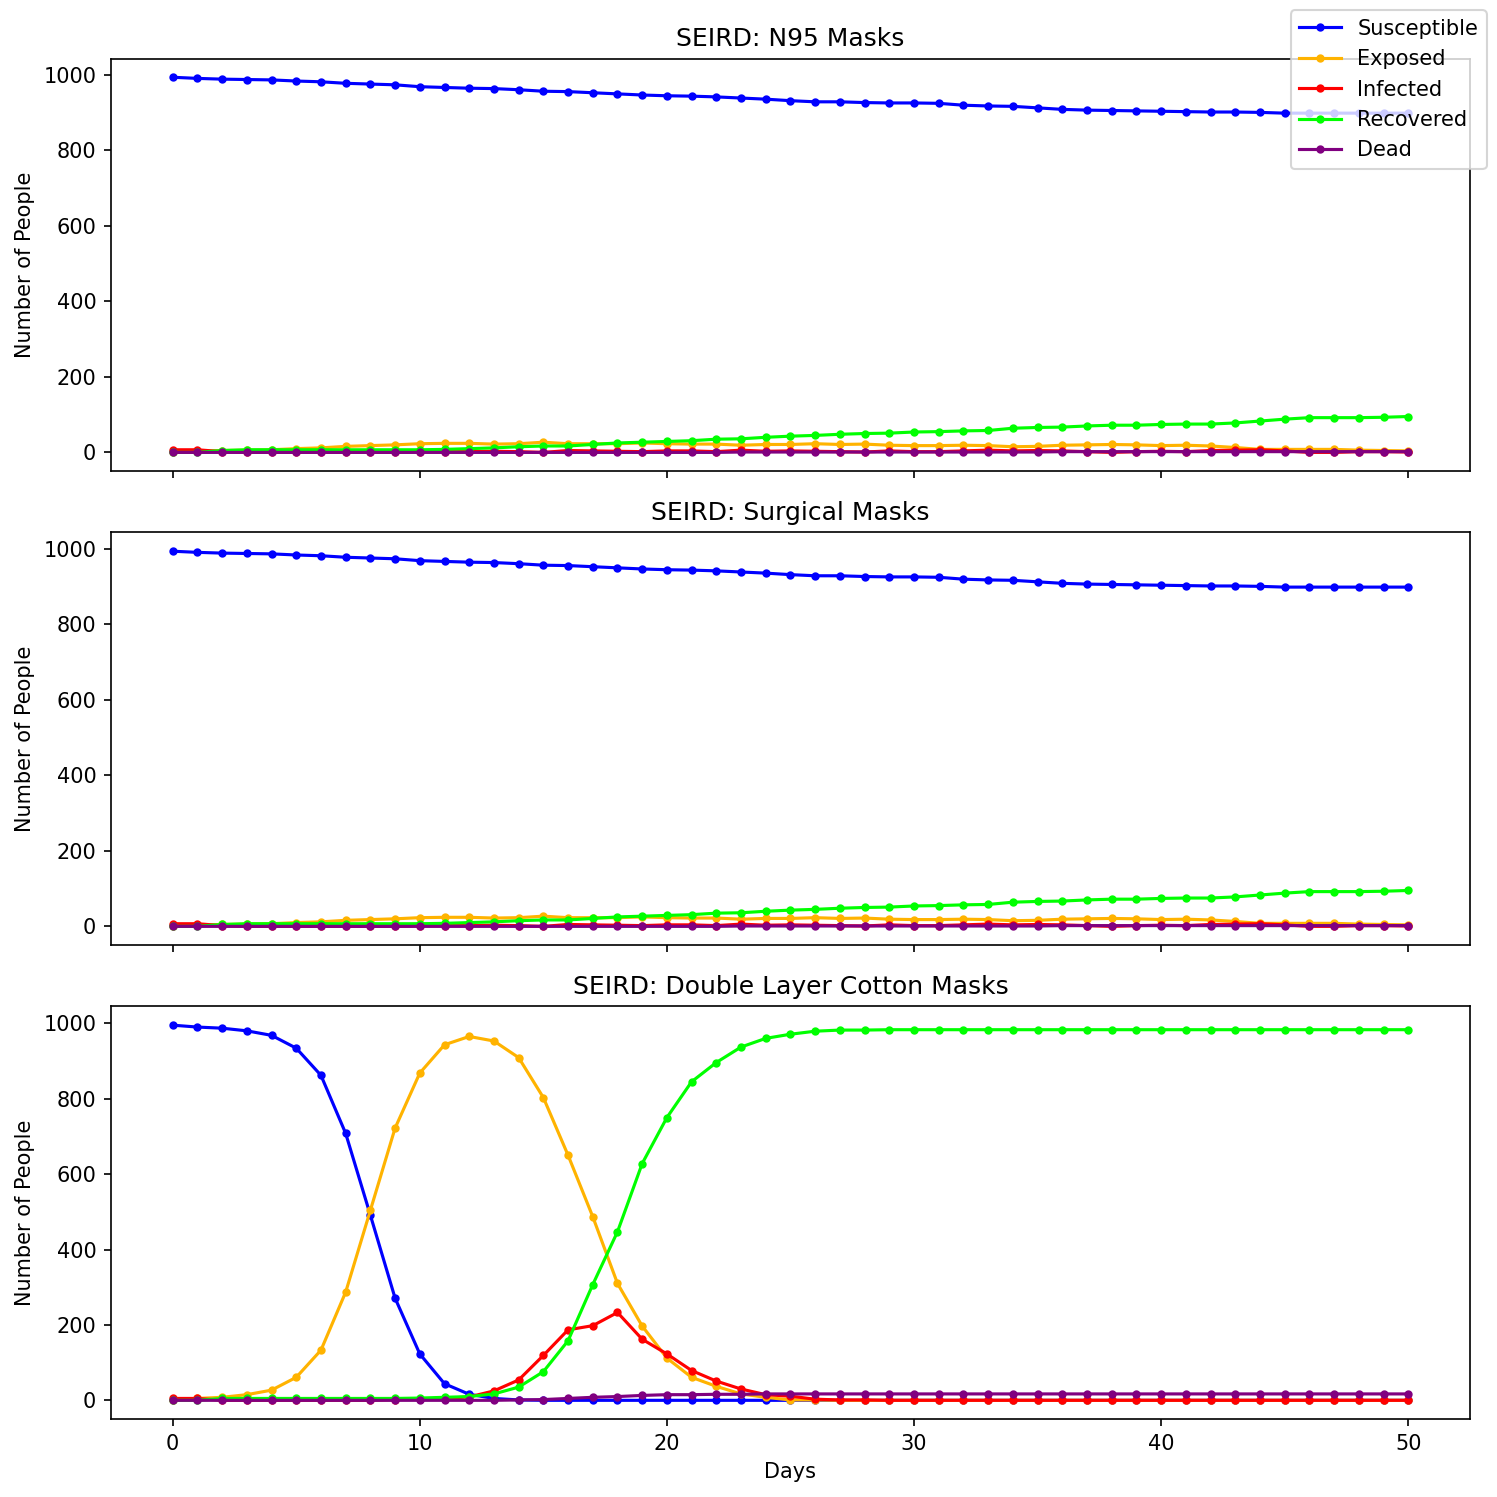

In [ ]:
"""
ABM constant parameter adjustment

<Default>
INIT_INFECTED=0.005, INFECTION_RATE=0.1, EXPOSED_RATE=0.5, RECOVERY_RATE=0.75,
SUSCEPTIBLE_RATE=0.1, DEATH_RATE=0.02, WEAR_MASK=0.5, WEAR_MASK_POPULATION=0.5,
VACCINATED=0.1, VACCINATED_POPULATION=0.5, HOSPITALIZED=0.5, BEFORE_HOSPITAL=14
"""

world1 = ABM(VACCINATED_POPULATION=0, HOSPITALIZED=0, WEAR_MASK=0.1, 
             WEAR_MASK_POPULATION=0.8)
world1.createWorld(num_people=1000)

world2 = ABM(VACCINATED_POPULATION=0, HOSPITALIZED=0, WEAR_MASK=0.25, 
             WEAR_MASK_POPULATION=0.8)
world2.createWorld(num_people=1000)

world3 = ABM(VACCINATED_POPULATION=0, HOSPITALIZED=0, WEAR_MASK=0.95, 
             WEAR_MASK_POPULATION=0.8)
world3.createWorld(num_people=1000)

hour = (day+1)*24

for h in range(hour):
    world1.nextGeneration()
    world2.nextGeneration()
    world3.nextGeneration()

world1.analysis("N95 Masks")
world2.analysis("Surgical Masks")
world3.analysis("Double Layer Cotton Masks")


plotCurves_main([world1.modelOutput("N95 Masks"),
                 world1.modelOutput("Surgical Masks"),
                 world3.modelOutput("Double Layer Cotton Masks")])

### Influence of Masked Population

Another analysis we would like to look into is the mask wearing population percentage(WEAR_MASK_POPULATION). Not only do we want to further examine the correctness of our model, we also want to see if this percentage brings any obvious impact to the timeline of the disease transmission.

The below 4 figures demonstrated the 4 ABM models that vary between the percentage of population that wears masks. Starting from the top, we observe that when only 25% of the initial population wears masks, the exposed and infectious populaiton had a higher peak and a wider curve until all infectious populatin either recovered or died. When 50% and 75% of the initial population wears masks, the models showed significant effects in terms of reducing the spread of the virus.

Another thing worth notice is the shape of the exposed population curve from each SEIRD curve. As the percentage of population that is wearing masks got higher than the curve that represents the exposed population got flatter and wider, and so did the infectious curve. This tells us that masks wearing not only reduces the amount of people get infected, it also slows down the timeline.


In [ ]:
day = 50


        25 Percent Masked Population
        Highest Exposed Popluation: 904 at Day: 12
        Highest Infected Popluation: 190 at Day: 17
        Ratio of Susceptible Population: 0.00
        

        50 Percent Masked Population
        Highest Exposed Popluation: 751 at Day: 17
        Highest Infected Popluation: 144 at Day: 21
        Ratio of Susceptible Population: 0.00
        

        75 Percent Masked Population
        Highest Exposed Popluation: 500 at Day: 20
        Highest Infected Popluation: 79 at Day: 24
        Ratio of Susceptible Population: 0.04
        

        100 Percent Masked Population
        Highest Exposed Popluation: 70 at Day: 49
        Highest Infected Popluation: 12 at Day: 50
        Ratio of Susceptible Population: 0.89
        


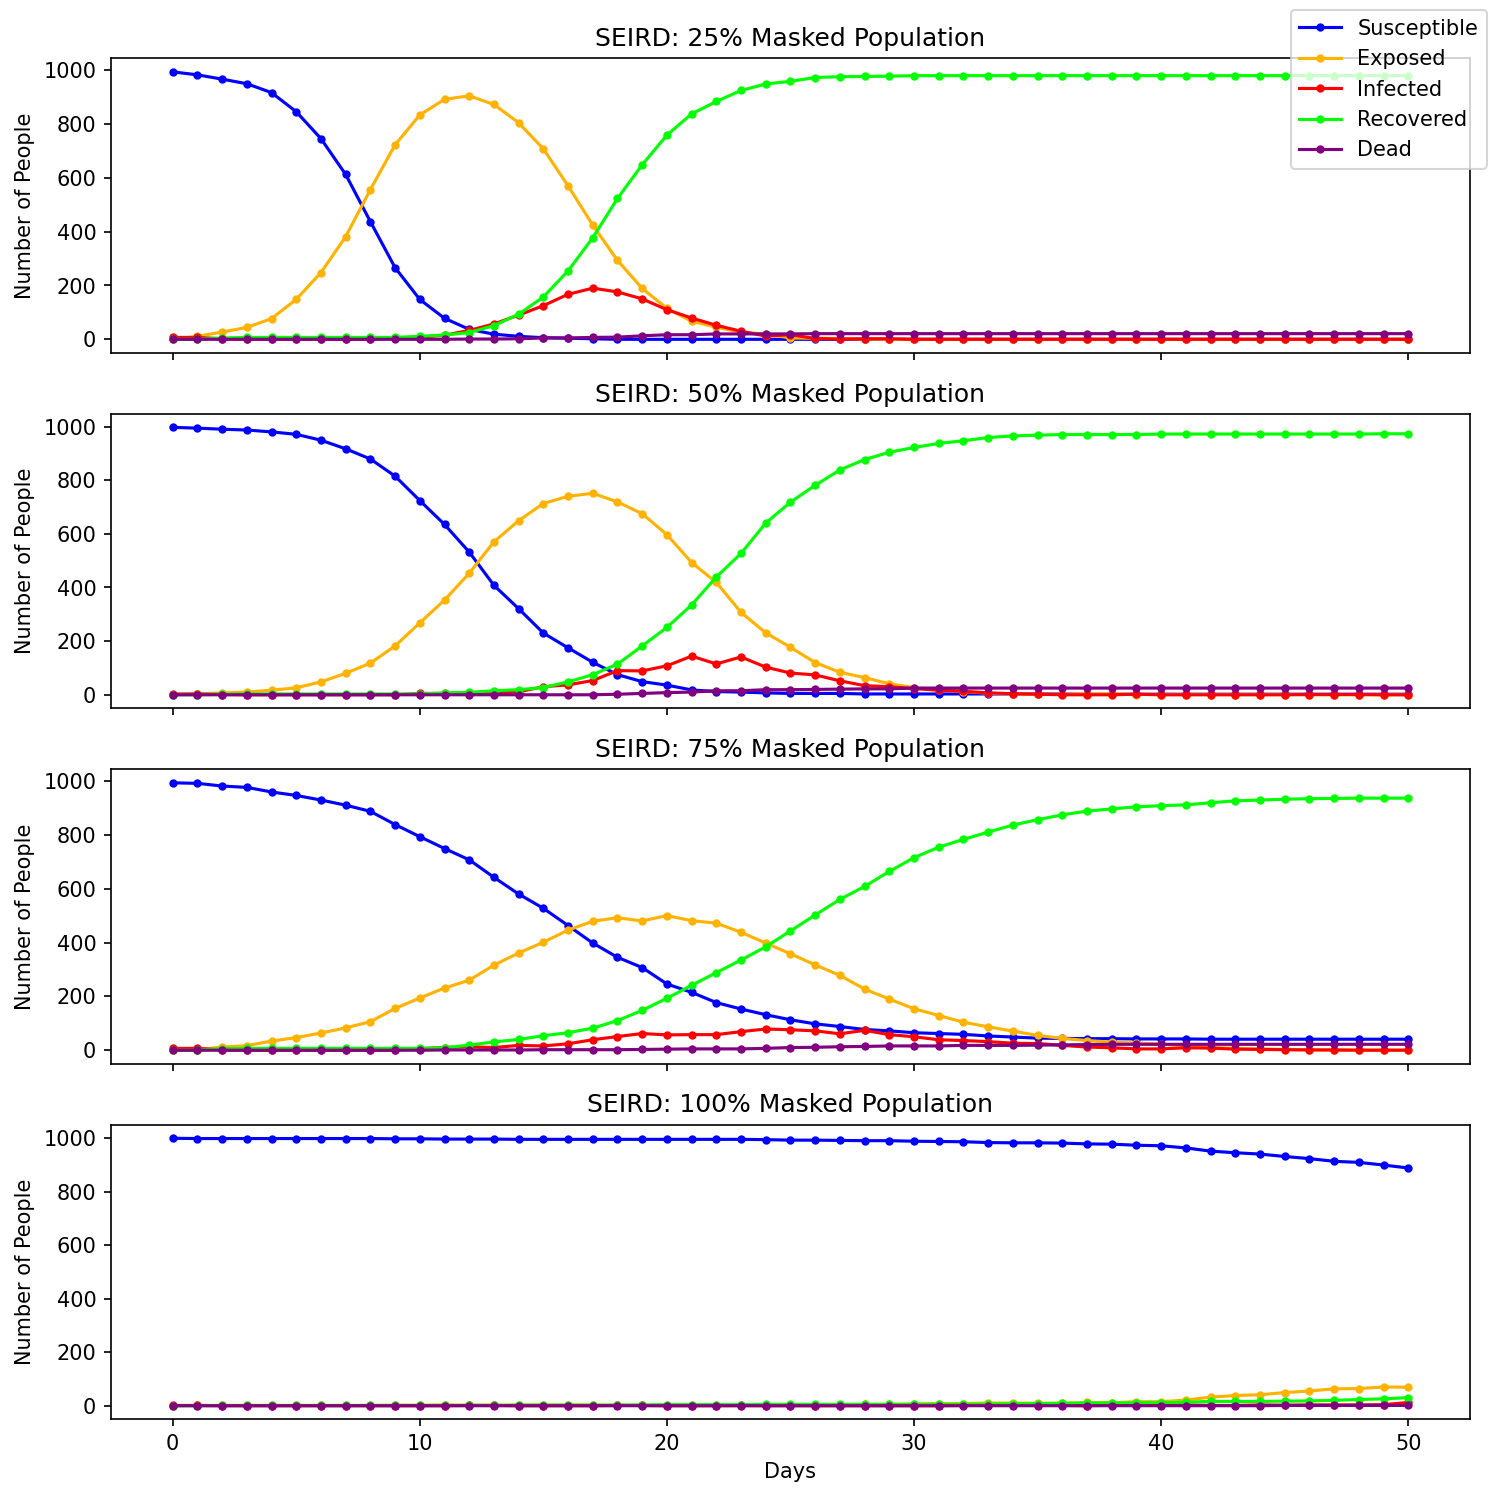

In [ ]:
"""
ABM constant parameter adjustment

<Default>
INIT_INFECTED=0.005, INFECTION_RATE=0.1, EXPOSED_RATE=0.5, RECOVERY_RATE=0.75,
SUSCEPTIBLE_RATE=0.1, DEATH_RATE=0.02, WEAR_MASK=0.5, WEAR_MASK_POPULATION=0.5,
VACCINATED=0.1, VACCINATED_POPULATION=0.5, HOSPITALIZED=0.5, BEFORE_HOSPITAL=14
"""
world1 = ABM(VACCINATED_POPULATION=0, HOSPITALIZED=0, WEAR_MASK=0.25, 
             WEAR_MASK_POPULATION=0.25)
world1.createWorld(num_people=1000)

world2 = ABM(VACCINATED_POPULATION=0, HOSPITALIZED=0, WEAR_MASK=0.25, 
             WEAR_MASK_POPULATION=0.5)
world2.createWorld(num_people=1000)

world3 = ABM(VACCINATED_POPULATION=0, HOSPITALIZED=0, WEAR_MASK=0.25, 
             WEAR_MASK_POPULATION=0.75)
world3.createWorld(num_people=1000)

world4 = ABM(VACCINATED_POPULATION=0, HOSPITALIZED=0, WEAR_MASK=0.25, 
             WEAR_MASK_POPULATION=1)
world4.createWorld(num_people=1000)

hour = (day+1)*24

for h in range(hour):
    world1.nextGeneration()
    world2.nextGeneration()
    world3.nextGeneration()
    world4.nextGeneration()


world1.analysis("25 Percent Masked Population")
world2.analysis("50 Percent Masked Population")
world3.analysis("75 Percent Masked Population")
world4.analysis("100 Percent Masked Population")

plotCurves_main([world1.modelOutput("25% Masked Population"),
                 world2.modelOutput("50% Masked Population"),
                 world3.modelOutput("75% Masked Population"),
                 world4.modelOutput("100% Masked Population")])


### Influence of Infected Population Being Hospitalized

During this section, we would like to investigate how hospitalization could possibly help prevent from the virus outbreak. Without the assistance of masks and vaccine, we created three worlds with different possibilities of being hospitalized among infected patients. In our setting, we set 0%, 50%, and 100% chances that infected people could be hospitalized as well as isolated from the world.

According to the results, there is no significant difference on the three SEIRD curves but a slight declination in the infected curve as the chance goes up. Yet, even 100% of hospitalization did not terminate the outbreak. The reason for that is obvious. COVID-19 has a long period of incubation, which is represented as "Exposed" state here in our simulation. In "Exposed" state, a patients is able to transmit the virus to the nearby people but not aware of the symptoms. Therefore, in our modeling, there is at least 7 days of incubation period and the virus is able to massively transmit among the population, undermining the effectiveness of hospitalization.


In [ ]:
day = 50


        0 Percent of Infected Population Being Hospitalized
        Highest Exposed Popluation: 970 at Day: 9
        Highest Infected Popluation: 229 at Day: 15
        Ratio of Susceptible Population: 0.00
        

        50 Percent of Infected Population Being Hospitalized
        Highest Exposed Popluation: 968 at Day: 12
        Highest Infected Popluation: 144 at Day: 17
        Ratio of Susceptible Population: 0.00
        

        100 Percent of Infected Population Being Hospitalized
        Highest Exposed Popluation: 960 at Day: 10
        Highest Infected Popluation: 102 at Day: 13
        Ratio of Susceptible Population: 0.00
        


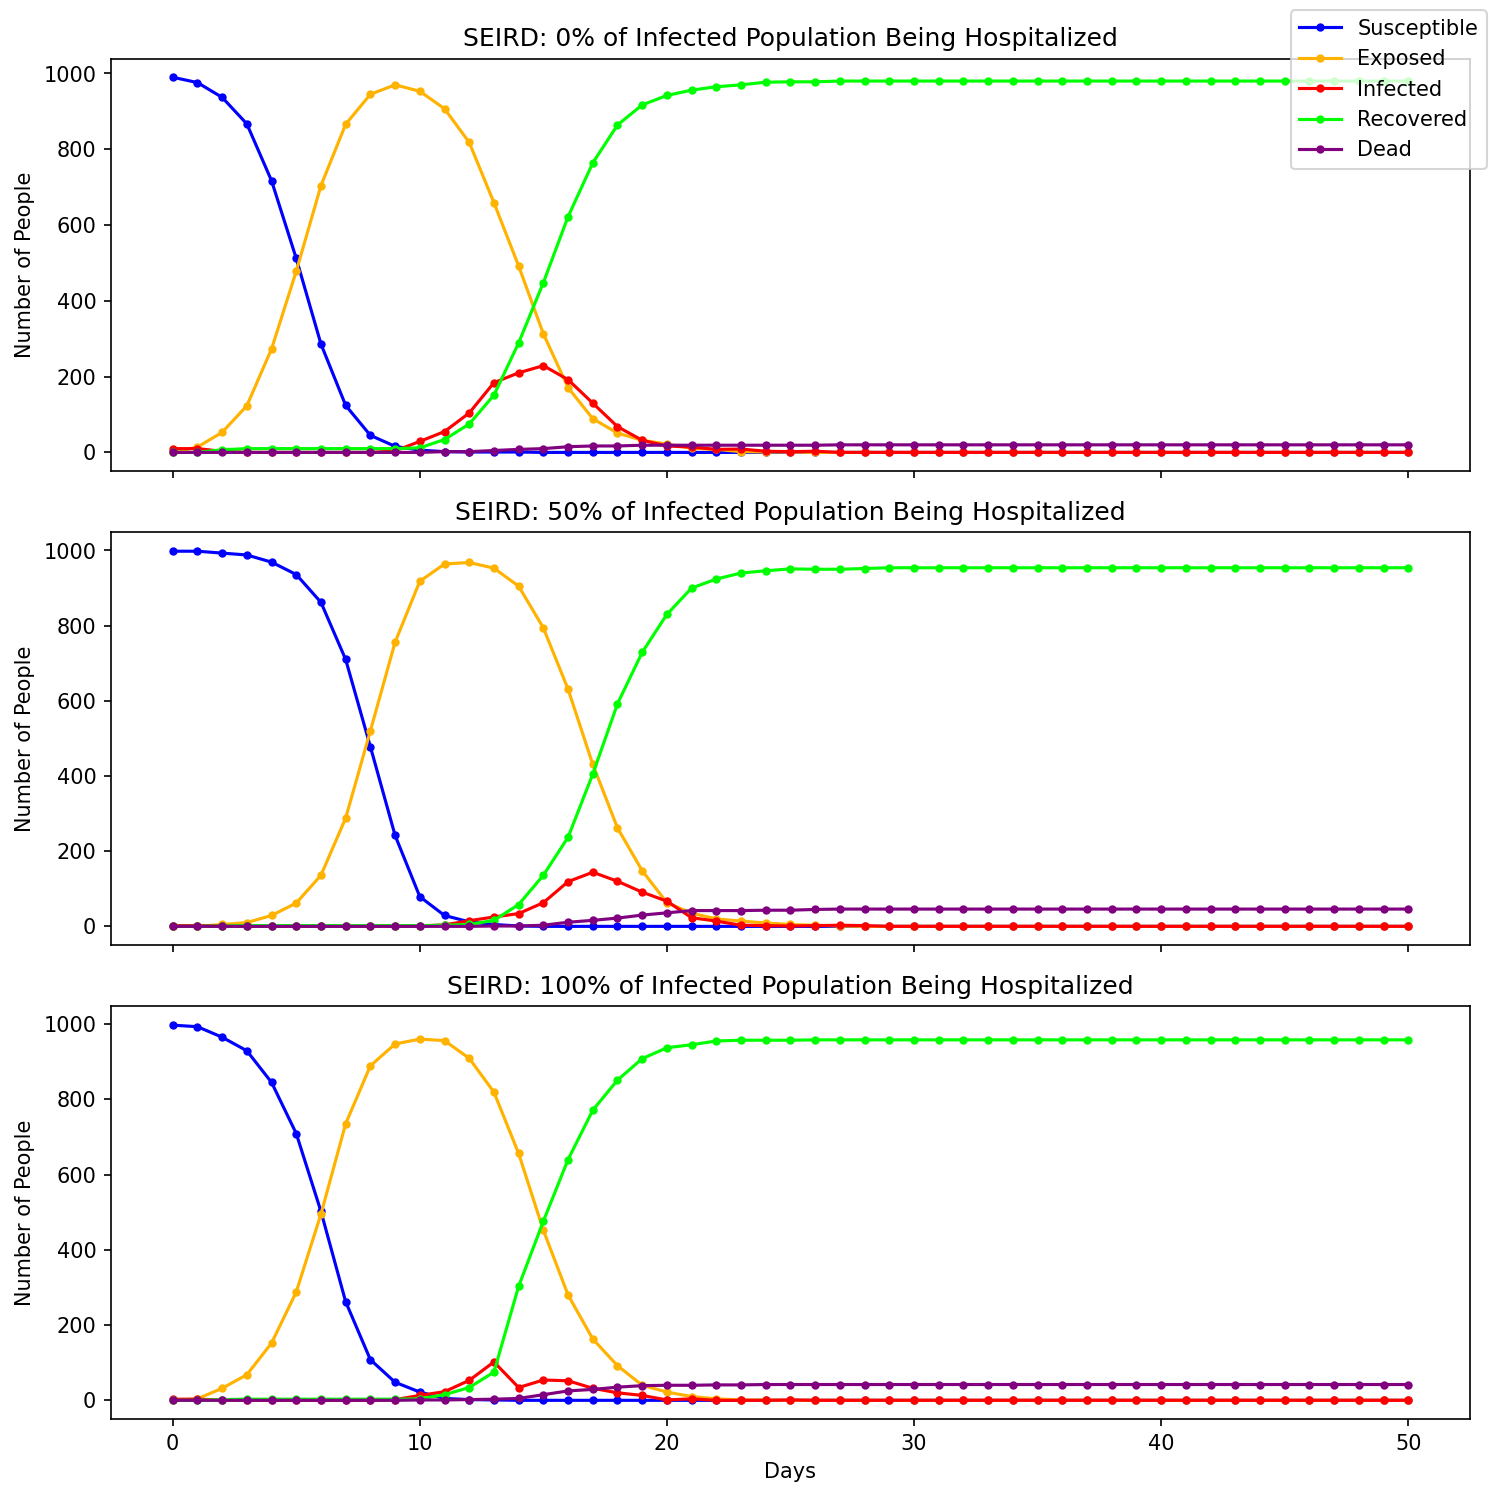

In [ ]:
"""
ABM constant parameter adjustment

<Default>
INIT_INFECTED=0.005, INFECTION_RATE=0.1, EXPOSED_RATE=0.5, RECOVERY_RATE=0.75,
SUSCEPTIBLE_RATE=0.1, DEATH_RATE=0.02, WEAR_MASK=0.5, WEAR_MASK_POPULATION=0.5,
VACCINATED=0.1, VACCINATED_POPULATION=0.5, HOSPITALIZED=0.5, BEFORE_HOSPITAL=14
"""
world1 = ABM(VACCINATED_POPULATION=0, HOSPITALIZED=0, WEAR_MASK_POPULATION=0)
world1.createWorld(num_people=1000)

world2 = ABM(VACCINATED_POPULATION=0, HOSPITALIZED=0.5, WEAR_MASK_POPULATION=0)
world2.createWorld(num_people=1000)

world3 = ABM(VACCINATED_POPULATION=0, HOSPITALIZED=1, WEAR_MASK_POPULATION=0)
world3.createWorld(num_people=1000)

hour = (day+1)*24

for h in range(hour):
    world1.nextGeneration()
    world2.nextGeneration()
    world3.nextGeneration()

world1.analysis("0 Percent of Infected Population Being Hospitalized")
world2.analysis("50 Percent of Infected Population Being Hospitalized")
world3.analysis("100 Percent of Infected Population Being Hospitalized")



plotCurves_main([world1.modelOutput(
    "0% of Infected Population Being Hospitalized"),
                 world2.modelOutput(
                     "50% of Infected Population Being Hospitalized"),
                 world3.modelOutput(
                     "100% of Infected Population Being Hospitalized")])


### Influence of Population Being Vaccinated

Vaccine is almost seen as the "Kryptonite" not only in our model but also in the real world. The power of vaccine in our model provides 90% of reduction in the infected rate. During this section, we would like to investigate how initial vaccinated population affects the outbreak in the first 50 days.

Without the influence of masks and hospitalization, 1%, 5%, 10%, 20%, and 50% of initial vaccinated population are created. Noting that with the increment of the days in the model, the program increases the vaccinated population by the percentage of the initial percentage. For instance, 1% needs 100 days to vaccinate the whole population. 5% needs 20 days and 50% only requires 2 days. 

As the curves show, 20% and 50% both indicate a good prevention on the virus outbreak. However, **it is worth noting that being able to vaccinate 1000 people within 5 days starting the virus outbreak is 100% not plausible**. Yet, the lower percentage is much closer to the real world situation but not be able to effectively stop the spread in time.

In [ ]:
day = 50


        1 Percent of Initial Vaccinated Population
        Highest Exposed Popluation: 934 at Day: 10
        Highest Infected Popluation: 230 at Day: 16
        Ratio of Susceptible Population: 0.01
        

        5 Percent of Initial Vaccinated Population
        Highest Exposed Popluation: 825 at Day: 10
        Highest Infected Popluation: 175 at Day: 15
        Ratio of Susceptible Population: 0.06
        

        10 Percent of Initial Vaccinated Population
        Highest Exposed Popluation: 522 at Day: 13
        Highest Infected Popluation: 89 at Day: 18
        Ratio of Susceptible Population: 0.20
        

        20 Percent of Initial Vaccinated Population
        Highest Exposed Popluation: 225 at Day: 13
        Highest Infected Popluation: 37 at Day: 15
        Ratio of Susceptible Population: 0.47
        

        50 Percent of Initial Vaccinated Population
        Highest Exposed Popluation: 23 at Day: 49
        Highest Infected Popluation: 8 at Day: 12
       

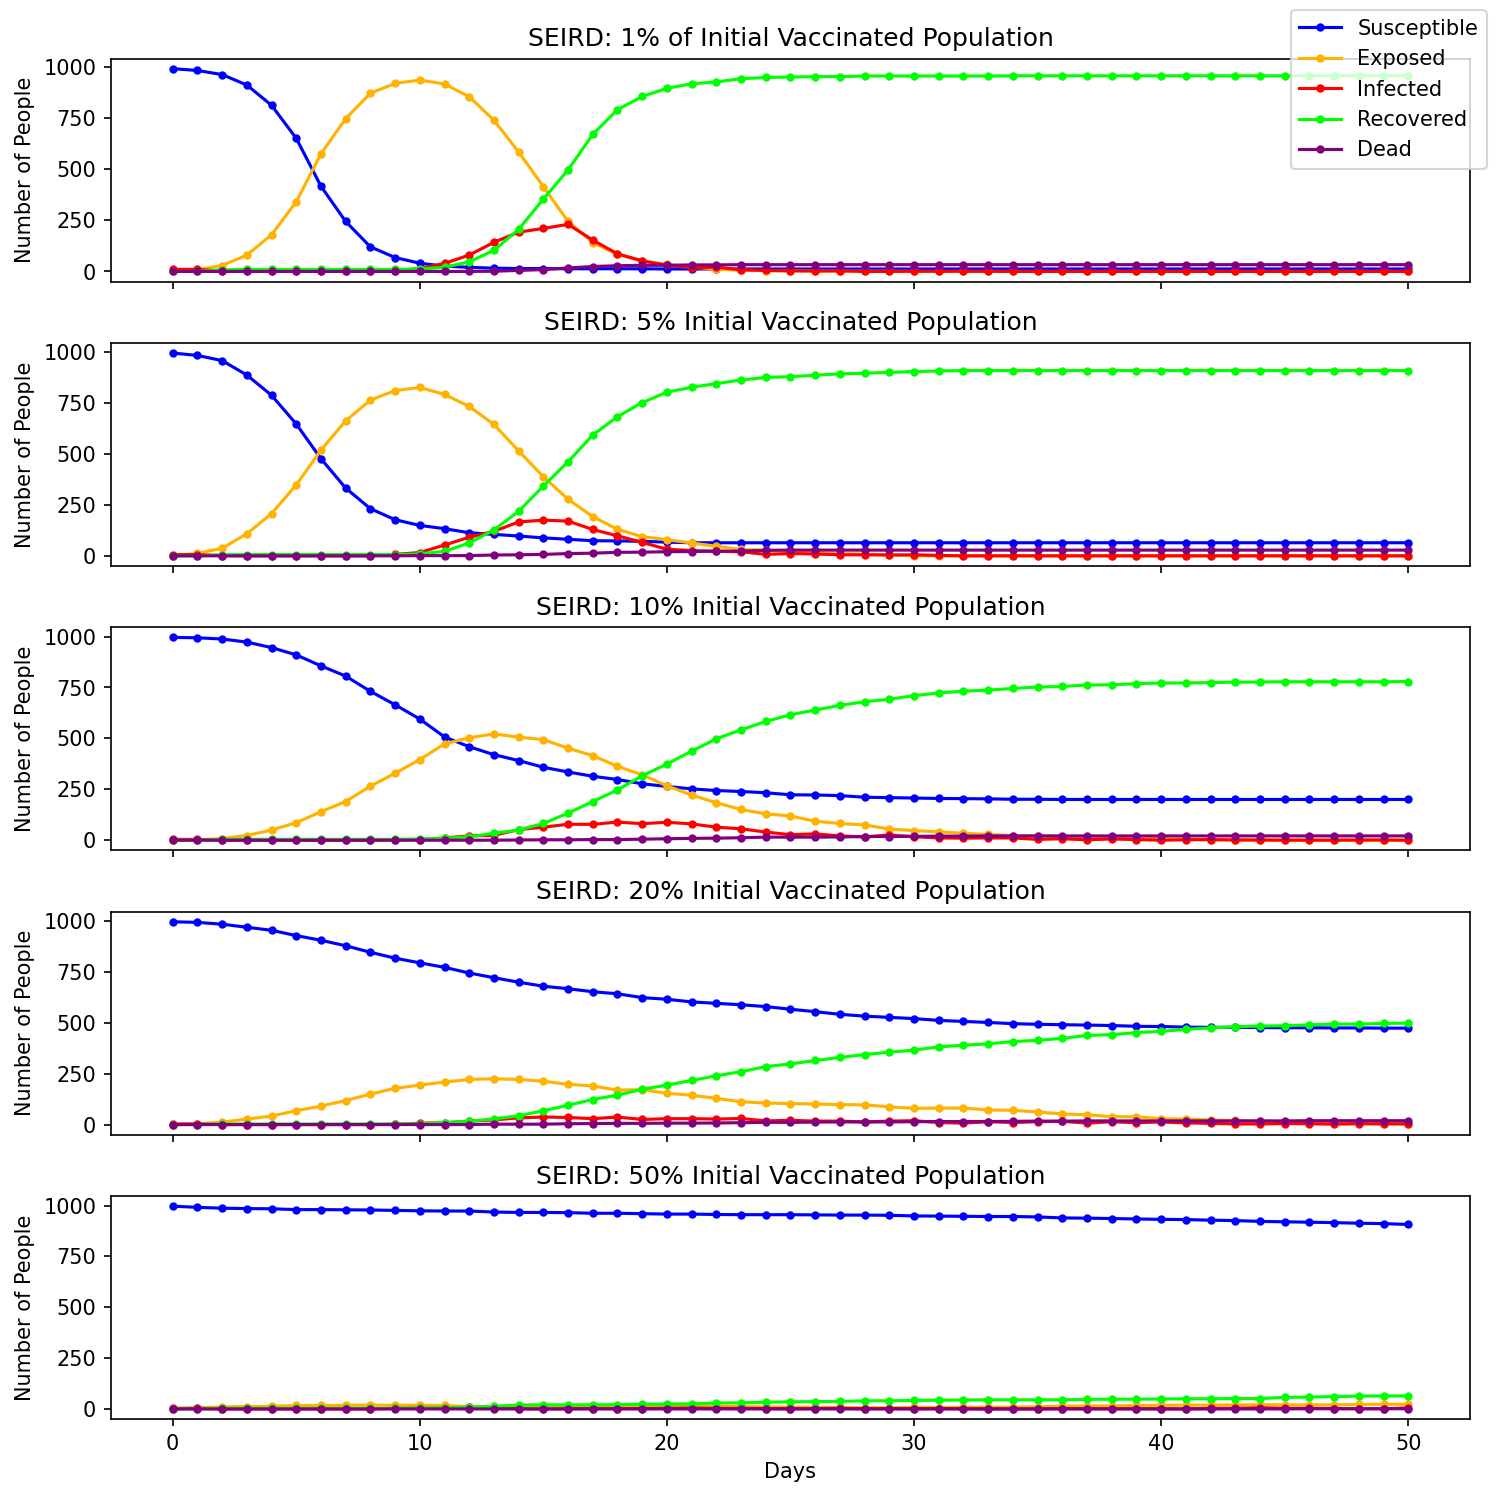

In [ ]:
"""
ABM constant parameter adjustment

<Default>
INIT_INFECTED=0.005, INFECTION_RATE=0.1, EXPOSED_RATE=0.5, RECOVERY_RATE=0.75,
SUSCEPTIBLE_RATE=0.1, DEATH_RATE=0.02, WEAR_MASK=0.5, WEAR_MASK_POPULATION=0.5,
VACCINATED=0.1, VACCINATED_POPULATION=0.5, HOSPITALIZED=0.5, BEFORE_HOSPITAL=14
"""
world1 = ABM(VACCINATED_POPULATION=0.01, HOSPITALIZED=0, WEAR_MASK_POPULATION=0)
world1.createWorld(num_people=1000)

world2 = ABM(VACCINATED_POPULATION=0.05, HOSPITALIZED=0, WEAR_MASK_POPULATION=0)
world2.createWorld(num_people=1000)

world3 = ABM(VACCINATED_POPULATION=0.1, HOSPITALIZED=0, WEAR_MASK_POPULATION=0)
world3.createWorld(num_people=1000)

world4 = ABM(VACCINATED_POPULATION=0.2, HOSPITALIZED=0, WEAR_MASK_POPULATION=0)
world4.createWorld(num_people=1000)

world5 = ABM(VACCINATED_POPULATION=0.5, HOSPITALIZED=0, WEAR_MASK_POPULATION=0)
world5.createWorld(num_people=1000)

hour = (day+1)*24

for h in range(hour):
    world1.nextGeneration()
    world2.nextGeneration()
    world3.nextGeneration()
    world4.nextGeneration()
    world5.nextGeneration()

world1.analysis("1 Percent of Initial Vaccinated Population")
world2.analysis("5 Percent of Initial Vaccinated Population")
world3.analysis("10 Percent of Initial Vaccinated Population")
world4.analysis("20 Percent of Initial Vaccinated Population")
world5.analysis("50 Percent of Initial Vaccinated Population")

plotCurves_main([world1.modelOutput("1% of Initial Vaccinated Population"),
                 world2.modelOutput("5% Initial Vaccinated Population"),
                 world3.modelOutput("10% Initial Vaccinated Population"),
                 world4.modelOutput("20% Initial Vaccinated Population"),
                 world5.modelOutput("50% Initial Vaccinated Population")])


### Best Case & Worst Case

What if COVID19 was being taking good care of in every corner of the world?

From an ideal and realistic standpoint, we create a world where 80% of population wearing N95 Masks, 50% of probability for infected population being hosptalized, and 10% of population being vaccinated since the world has identified the patient zero. On the other hand, the world that doesn't provide mask, vaccine, and hospitalization in the first 50 days of the outbreak is created to compared the difference between best case and worst case.

The result is obviously predictable.



In [ ]:
day = 50


        Best Case
        Highest Exposed Popluation: 19 at Day: 8
        Highest Infected Popluation: 6 at Day: 0
        Ratio of Susceptible Population: 0.95
        

        Worst Case
        Highest Exposed Popluation: 955 at Day: 11
        Highest Infected Popluation: 240 at Day: 16
        Ratio of Susceptible Population: 0.00
        


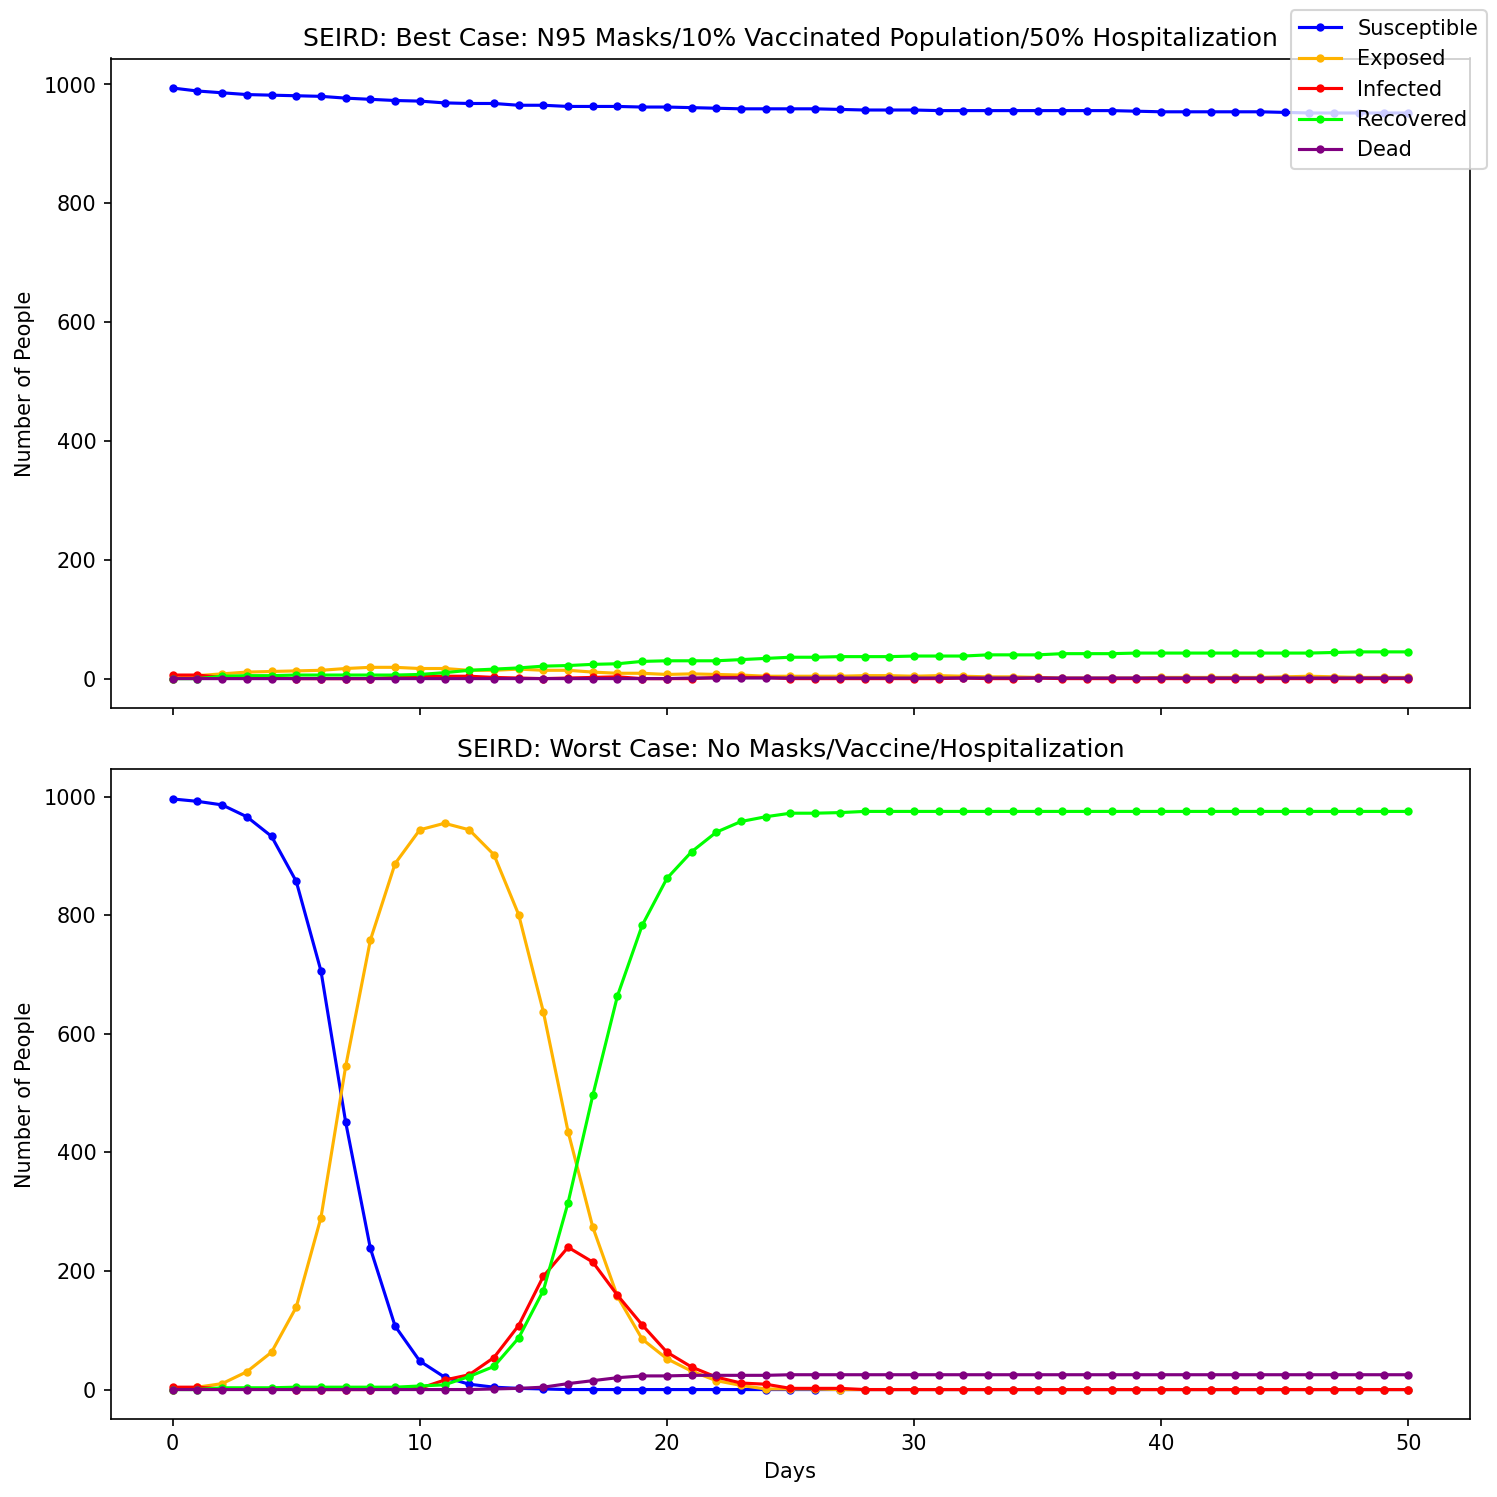

In [ ]:
"""
ABM constant parameter adjustment

<Default>
INIT_INFECTED=0.005, INFECTION_RATE=0.1, EXPOSED_RATE=0.5, RECOVERY_RATE=0.75,
SUSCEPTIBLE_RATE=0.1, DEATH_RATE=0.02, WEAR_MASK=0.5, WEAR_MASK_POPULATION=0.5,
VACCINATED=0.1, VACCINATED_POPULATION=0.5, HOSPITALIZED=0.5, BEFORE_HOSPITAL=14
"""
world1 = ABM(VACCINATED_POPULATION=0.01, HOSPITALIZED=0.5, 
             WEAR_MASK_POPULATION=0.8, WEAR_MASK=0.1)
world1.createWorld(num_people=1000)

world2 = ABM(VACCINATED_POPULATION=0, HOSPITALIZED=0, 
             WEAR_MASK_POPULATION=0)
world2.createWorld(num_people=1000)

hour = (day+1)*24

for h in range(hour):
    world1.nextGeneration()
    world2.nextGeneration()

world1.analysis("Best Case")
world2.analysis("Worst Case")

plotCurves_main([world1.modelOutput(
    "Best Case: N95 Masks/10% Vaccinated Population/50% Hospitalization"),
                 world2.modelOutput(
                     "Worst Case: No Masks/Vaccine/Hospitalization")])


# Real World Comparison

* Basic SEIR Model

    After building our basic SEIR model, we compared it with the SEIR model from a referenced paper. From the figure below (Left: referenced paper, Right: our result), we can clearly see some differences between the Exposed and Infected curve. In our SEIR model, the status must become exposed before infectious, which is different from the referenced paper. If the paper used the same design method, their exposed curve would rise higher and look similar to our model. Also, the trend of the susceptible and recovered curves are similar. Therefore, we are confident that our basic SEIR model is reasonable.

<p float="left" align="middle">
    <img src="Image/Case Study/referenced paper/SEIR.png" width="400" />
    <img src="Image/Case Study/figure of our data/SEIR.png" width="400" />
</p>

* Mask

    Then, we compared our result of wearing masks with other research. From the figure below (Left: referenced paper, Right: our result), we found that no matter in our model or the referenced study, 50% of the population wearing masks did not change much on the spread of the Covid-19. However, when we implemented the case of 100% wearing masks, we can see that the result of our model is almost the same as the referenced paper.

- 50 % Mask-Wearing Population
<p float="left" align="middle">
    <img src="Image/Case Study/referenced paper/50_ wear mask.png" width="400" />
    <img src="Image/Case Study/figure of our data/mask-50.png" width="400" />
</p>

- 100 % Mask-Wearing Population
<p float="left" align="middle">
    <img src="Image/Case Study/referenced paper/100_ wear mask.png" width="400" />
    <img src="Image/Case Study/figure of our data/mask-100.png" width="400" />
</p>

* Vaccination

    For the vaccination, the figures below showed that both in our model and the other study, the Exposed and Infectious curve decrease obviously when the vaccinated rate increase. Also, this result is reasonable to our expectation that vaccination should effectively prevent people from being infected.

<p float="left" align="middle">
    <img src="Image/Case Study/referenced paper/vaccine_0.png" width="400" />
    <img src="Image/Case Study/figure of our data/vaccine.png" width="400" />
</p>

* Hospitalization

    While considering the effectiveness of hospitalization, the expectation is that it should lower the Exposed and Infectious cases by hospitalizing those potential patients. From the figures below, both of the results from our model and the referenced paper showed that the Exposed and Infectious numbers decrease. However, the design of our model is different from the referenced paper. The final result of the susceptible curve looks different. We think that it is possible that they also hospitalized some susceptible people and thus cause the curve to look different.

<p float="left" align="middle">
    <img src="Image/Case Study/referenced paper/frontiers_2.png" width="400" />
    <img src="Image/Case Study/referenced paper/frontiers_1.png" width="400" />
</p>
<img src="Image/Case Study/figure of our data/hospitalized-0.png" width="800" align="middle" />
<img src="Image/Case Study/figure of our data/hospitalized-50.png" width="800" align="middle" />


# Extra - SEIRZ: ZOMBIE APOCALPSE

For this extra section, we are just trying to have some fun and implement creative modifications that our simulation model could do. Therefore, We implemented a "Zombie Mode" within our model to simulate a "SEIRZ" model, instead of a "SEIRD". The fundamental rules of the SERIZ model is still similar to SEIRD, but the population that are supposed to be dead would turn into zombies and continue to terrorize the rest of the population within our simulated world. The zombies would continue to infect people, and they roam around the world 24 hours a day. They could invade people's houses and offices as they hunt for the flesh! Assuming the vaccine would help reducing the infection from zombie bites and the masks would reduce the chance of being infected by a nasty zombie bite. We would like to see if the vaccines and masks could also slow down the walking dead army roam through the world!

The 2 figures below simulated 2 scenarios of the SEIRZ model, aka. zombie mode. The upper figure is mainly simulating a high percentage of the population wearing mask and getting vaccinated. The lower figure shows 0% of the population wearing mask or getting vaccinated. The impact of the mask and vaccination was significant. The lower figure was dominated by the zombies while the majority of the population in the upper world survived through the apocalpse. Now we got a better idea of how to fight the zombies when we need it :)

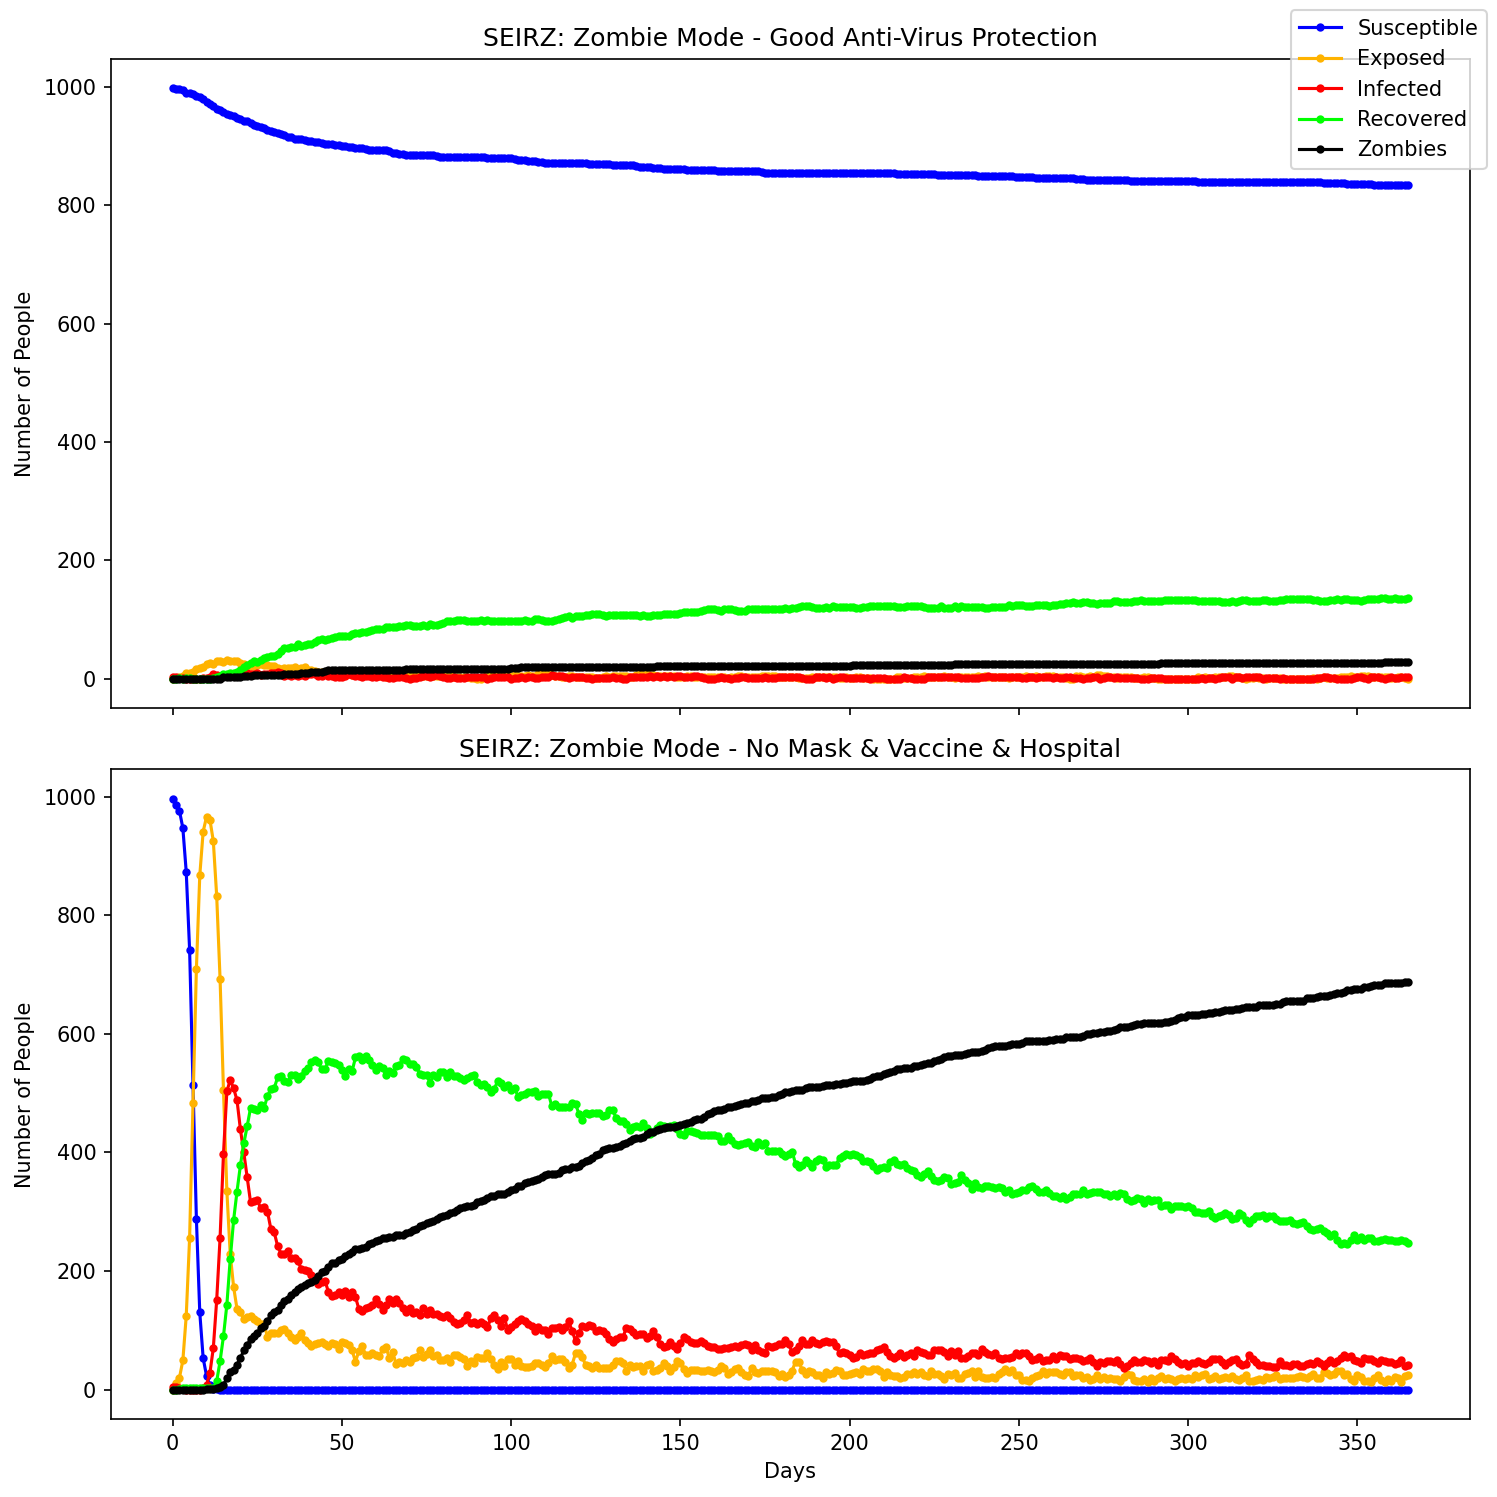

In [ ]:
day = 365
hour = (day+1)*24

worldZ1 = ABM(INFECTION_RATE=0.1, EXPOSED_RATE=0.5, DEATH_RATE=0.02,
             RECOVERY_RATE=0.2, BEFORE_HOSPITAL=14, WEAR_MASK_POPULATION=0.9,
             VACCINATED_POPULATION=0.1, zombieMode=True)
worldZ1.createWorld(num_people=1000)

worldZ2 = ABM(INFECTION_RATE=0.1, EXPOSED_RATE=0.5, DEATH_RATE=0.02, 
             RECOVERY_RATE=0.2, WEAR_MASK_POPULATION=0,
             VACCINATED_POPULATION=0, HOSPITALIZED=0, zombieMode=True)
worldZ2.createWorld(num_people=1000)

for h in range(hour):
    worldZ1.nextGeneration()
    worldZ2.nextGeneration()

plotCurves_main([worldZ1.modelOutput("Zombie Mode - Good Anti-Virus Protection"),
                 worldZ2.modelOutput("Zombie Mode - No Mask & Vaccine & Hospital")])

# Conclusion

In conclusion, our ABM model was able to simulate the obvious trend of vaccination and mask wearing effects the spread of virus. Even though it is not close to an exact simulation of the real world, we were still able to observe and examine multiple different degrees of personal protective equipments would affect the virus spread. Besides that, the ABM model also managed to show the impact of an effective vaccine could have significant positive effect to the pandemic. Well, there's still many combinations and study cases we could observe with this model, such as medical response time, variants of vaccines, and even different compartmental models. Through the obvious cases, we were able to prove the correctness of the model and look more detail into how these different measures impact the pandemic.

In our analysis and modeling, we focused on the impact of masks wearing population, variants of masks, and the effects of vaccination. We observed that masks wearing population proposed a noteworthy impact to the simulation results. When 100 % of the population wears effective masks, such as surgical masks, the infected population were over 80% lower than when there's only 25% of the population wears effective masks. The results were even more daunting when agents (people) within the simulation wears non-effective masks, such as double-layer cotton masks. The inability of blocking outward emission particles from breathing and coughing leads to results similiar to a population without wearing masks at all. In other words, non-effective masks has 0 impact in terms of preventing the virus spread.

Vaccination was another part of the focus we have on our analysis and modeling. We observe that, with the help of effective vaccines, the spread of virus was able to be contained extremely well. This was a promising result, since we have gradually seen the vaccinated population raised in the real world. Therefore, we observe a significant decrease in infected population and even death population caused by virus in our simulated world models. With only an initial 10% of vaccinated population and an increase of 0.1% population per day, we see promising results that contained the virus way better than no vaccine at all.

In addition, we made some modifications to see if our model would do in a simulated zombie apocalpse, cause why not? As it turned out, mask and vaccination could still very much prevent the walking dead from roaming over our simulated world!

# Colaboration
[COVID Simulation Project Github](https://github.gatech.edu/phsu40/CSE6730-Covid-Simulation.git)

We managed to store our code through Github and work daily on the project through VSCode's Live-Share extension. All the work was done collaboratively and synchronously. Everyone shares an equal amount of the workload during this project.

# Reference: 
 * [1] [COVID-ABS: An agent-based model of COVID-19 epidemic to simulate health and economic effects of social distancing interventions](https://reader.elsevier.com/reader/sd/pii/S0960077920304859?token=315C3393A6229C5AB8B7E8566F6E4E5B127349BA76D369BBD3D20C20B63D7040A503CE8FE00D08BE6C459A2C817C57DC&originRegion=us-east-1&originCreation=20210411164718) [Source Code](https://github.com/petroniocandido/COVID19_AgentBasedSimulation)
 * [2] [Modeling and forecasting of COVID-19 using a hybrid dynamic model based on SEIRD with ARIMA corrections](https://www.sciencedirect.com/science/article/pii/S2468042720301032)
 * [3] [Measuring and Preventing COVID-19 Using the SIR Model and Machine Learning in Smart Health Care](https://www.hindawi.com/journals/jhe/2020/8857346/)
 * [4] [A Simulation of a COVID-19 Epidemic Based on a Deterministic SEIR Model](https://www.frontiersin.org/articles/10.3389/fpubh.2020.00230/full)
 * [5] [SEIR and SEIRS models](https://docs.idmod.org/projects/emod-hiv/en/latest/model-seir.html)
 * [6] [Simulate Covid-19 in your area with Python — beyond SIR models (Individual-Based-Simulation)](https://towardsdatascience.com/model-the-covid-19-epidemic-in-detail-with-python-98f0d13f3a0e)
 * [7] [Modeling COVID-19 scenarios for United States (mask no mask, death rate, SEIR)](https://www.nature.com/articles/s41591-020-1132-9#Sec7)
 * [8] [Python Coronavirus Simulation](https://github.com/paulvangentcom/python_corona_simulation)
 * [9] [A model based on cellular automata to estimate the social isolation impact on COVID-19 spreading in Brazil](https://www.sciencedirect.com/science/article/pii/S0169260720316655)
 * [10] [A data-driven understanding of COVID-19 dynamics using sequential genetic algorithm based probabilistic cellular automata](https://arxiv.org/pdf/2008.12020.pdf)
 * [11] [Analytical and cellular automaton approach to a generalized SEIR model for infection spread in an open crowded space](https://journals.aps.org/prresearch/pdf/10.1103/PhysRevResearch.2.043379)
 * [12] [Computational model on COVID-19 Pandemic using Probabilistic Cellular Automata](https://arxiv.org/pdf/2006.11270.pdf)
 * [13] [An agent-based model of the interrelation between the COVID-19 outbreak and economic activities](https://royalsocietypublishing.org/doi/10.1098/rspa.2020.0604)
 * [14] [COVID-ABS: An agent-based model of COVID-19 epidemic to simulate health and economic effects of social distancing interventions](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7340090/)
 * [15] [Universal Masking is Urgent in the COVID-19 Pandemic: SEIR and Agent Based Models, Empirical Validation, Policy Recommendations](https://arxiv.org/pdf/2004.13553.pdf)
 * [16] [Efficacy of masks and face coverings in controlling outward aerosol particle emission from expiratory activities](https://www.nature.com/articles/s41598-020-72798-7)

 